Libraries

In [118]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [119]:
warnings.filterwarnings('ignore')

Data Set

In [3]:
raw_data = pd.read_csv('D:/Bootcamp/Tugas/Capstone_Project_2/Data/Raw_Data/NYC_TLC_Trip_Record.csv', sep=',')
raw_data_copy = raw_data.copy()
raw_data_copy.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [120]:
loc_data = pd.read_csv('D:/Bootcamp/Tugas/Capstone_Project_2/Data/Location_ID/taxi_zone_lookup.csv', sep=',')
loc_data_copy = loc_data.copy()
loc_data_copy.tail()

,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


In [121]:
data_frame = pd.merge(raw_data_copy,loc_data_copy.add_prefix('PU'),left_on="PULocationID",right_on="PULocationID",how="left")
data_frame = pd.merge(data_frame,loc_data_copy.add_prefix('DO'),left_on="DOLocationID",right_on="DOLocationID",how="left")
data_frame.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


Skimming

In [122]:
pd.DataFrame({
    'feature':data_frame.columns.values,
    'data_type':data_frame.dtypes.values,
    'null_value_in_precentage_(%)':data_frame.isna().mean().values*100,
    'negative_value_in_percentage_(%)':[len(data_frame[col][data_frame[col]<0])/len(data_frame)*100 if col in data_frame.select_dtypes(include=[np.number]).columns else 0 for col in data_frame.columns],
    'zero/0_value_in_percentage_(%)':[len(data_frame[col][data_frame[col]==0])/len(data_frame)*100 if col in data_frame.select_dtypes(include=[np.number]).columns else 0 for col in data_frame.columns],
    'duplicate':data_frame.duplicated().sum(),
    'n_unique':data_frame.nunique().values,
    'sample_unique':[data_frame[col].unique() for col in data_frame.columns]
}).round(3)

,feature,data_type,null_value_in_precentage_(%),negative_value_in_percentage_(%),zero/0_value_in_percentage_(%),duplicate,n_unique,sample_unique
0,VendorID,int64,0.000,0.000,0.000,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000,0.000,0.000,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.000,0.000,0.000,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,6.339,0.000,0.000,0,2,"[N, Y, nan]"
4,RatecodeID,float64,6.339,0.000,0.000,0,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0.000,0.000,0.000,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000,0.000,0.000,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,6.339,0.000,0.493,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0.000,0.000,4.911,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0.000,0.258,0.122,0,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Distribution of Missing Values

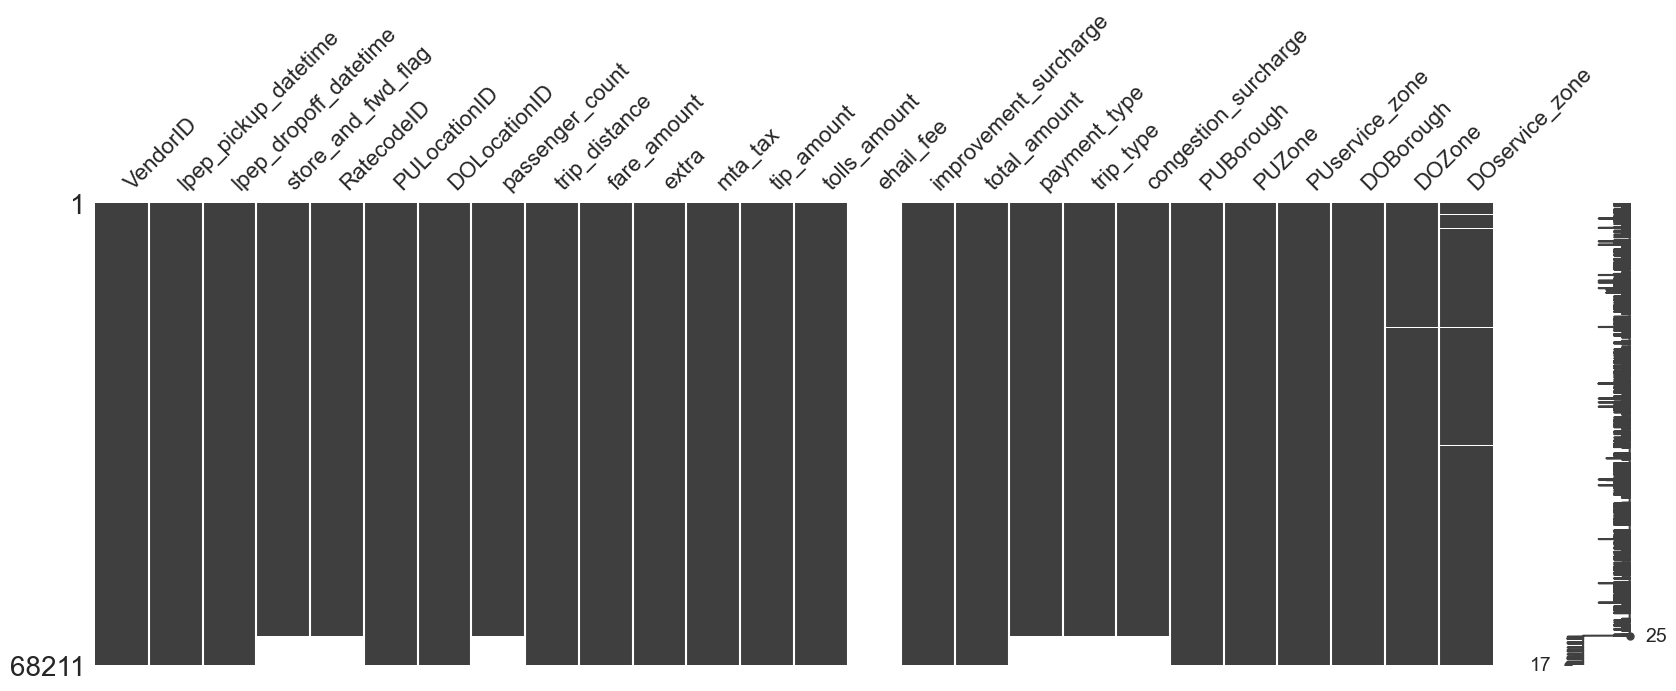

In [123]:
msno.matrix(data_frame,figsize=(20,6))
plt.show()

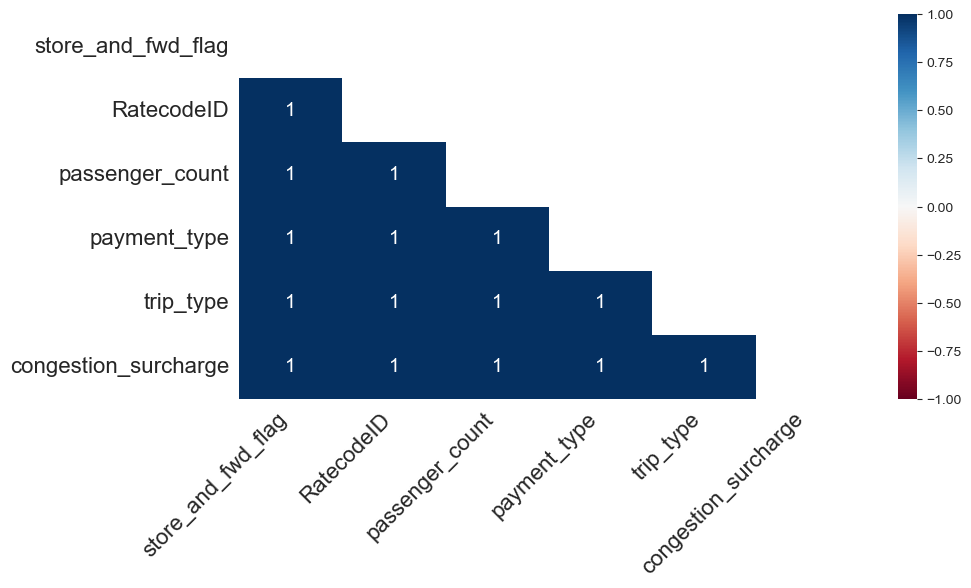

In [124]:
msno.heatmap(raw_data_copy,figsize=(10,5))
plt.show()

Pengeksploran Data

    Distribution of Data

In [125]:
data_frame.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


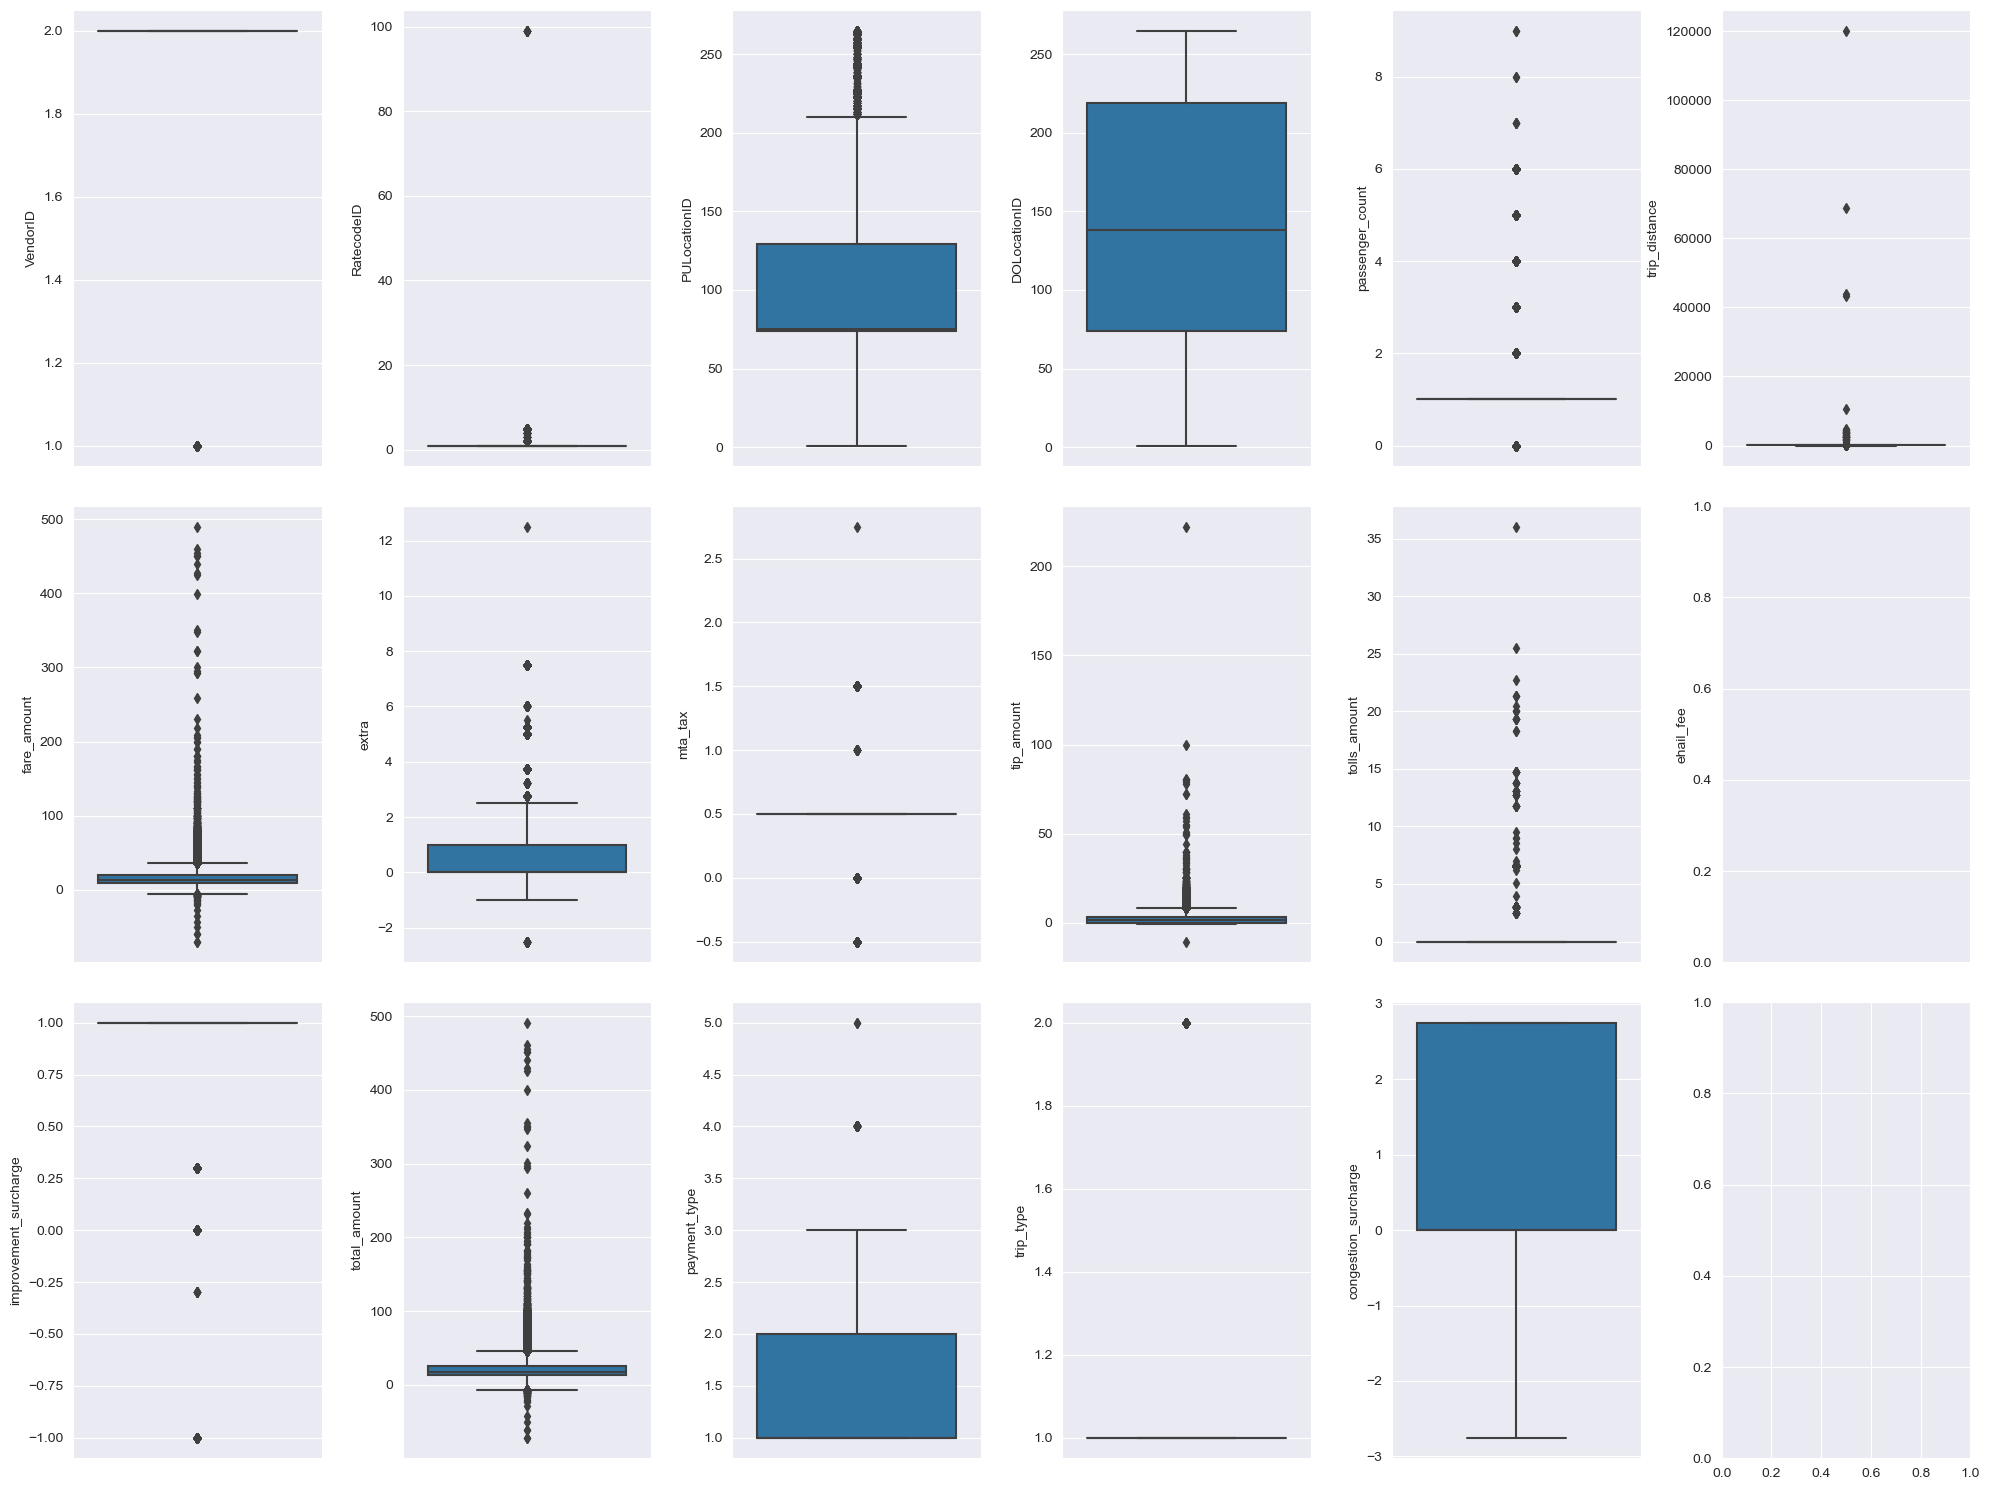

In [126]:
fig, axis = plt.subplots(ncols=6,nrows=3,figsize=(20,15))
index = 0
axis = axis.flatten()
for a, b in data_frame.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=a, data=data_frame, ax=axis[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)

In [127]:
data_frame.drop(['VendorID','store_and_fwd_flag','ehail_fee','extra','mta_tax','tolls_amount','improvement_surcharge','congestion_surcharge','total_amount','PUservice_zone','DOservice_zone'],axis=1,inplace=True)
data_frame.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.2,1.94,1.0,1.0,Queens,Steinway,Queens,Old Astoria
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North


    Data Correlation

In [128]:
data_frame['lpep_dropoff_datetime'] = pd.to_datetime(data_frame['lpep_dropoff_datetime'])
data_frame['lpep_pickup_datetime'] = pd.to_datetime(data_frame['lpep_pickup_datetime'])
data_frame['lpep_pickup_datetime'] = data_frame['lpep_pickup_datetime'].apply(lambda x: x.timestamp())
data_frame['lpep_dropoff_datetime'] = data_frame['lpep_dropoff_datetime'].apply(lambda x: x.timestamp())

data_frame.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,1.672533e+09,1.672533e+09,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,1.672534e+09,1.672535e+09,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
2,1.672533e+09,1.672534e+09,1.0,223,179,1.0,0.00,7.2,1.94,1.0,1.0,Queens,Steinway,Queens,Old Astoria
3,1.672532e+09,1.672532e+09,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1.672533e+09,1.672534e+09,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North


In [129]:
data_frame.dtypes

lpep_pickup_datetime     float64
lpep_dropoff_datetime    float64
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
tip_amount               float64
payment_type             float64
trip_type                float64
PUBorough                 object
PUZone                    object
DOBorough                 object
DOZone                    object
dtype: object

In [130]:
data_frame.drop(['PUBorough','PUZone','DOBorough','DOZone'],axis=1,inplace=True)
data_frame.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type
0,1.672533e+09,1.672533e+09,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0
1,1.672534e+09,1.672535e+09,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0
2,1.672533e+09,1.672534e+09,1.0,223,179,1.0,0.00,7.2,1.94,1.0,1.0
3,1.672532e+09,1.672532e+09,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0
4,1.672533e+09,1.672534e+09,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0


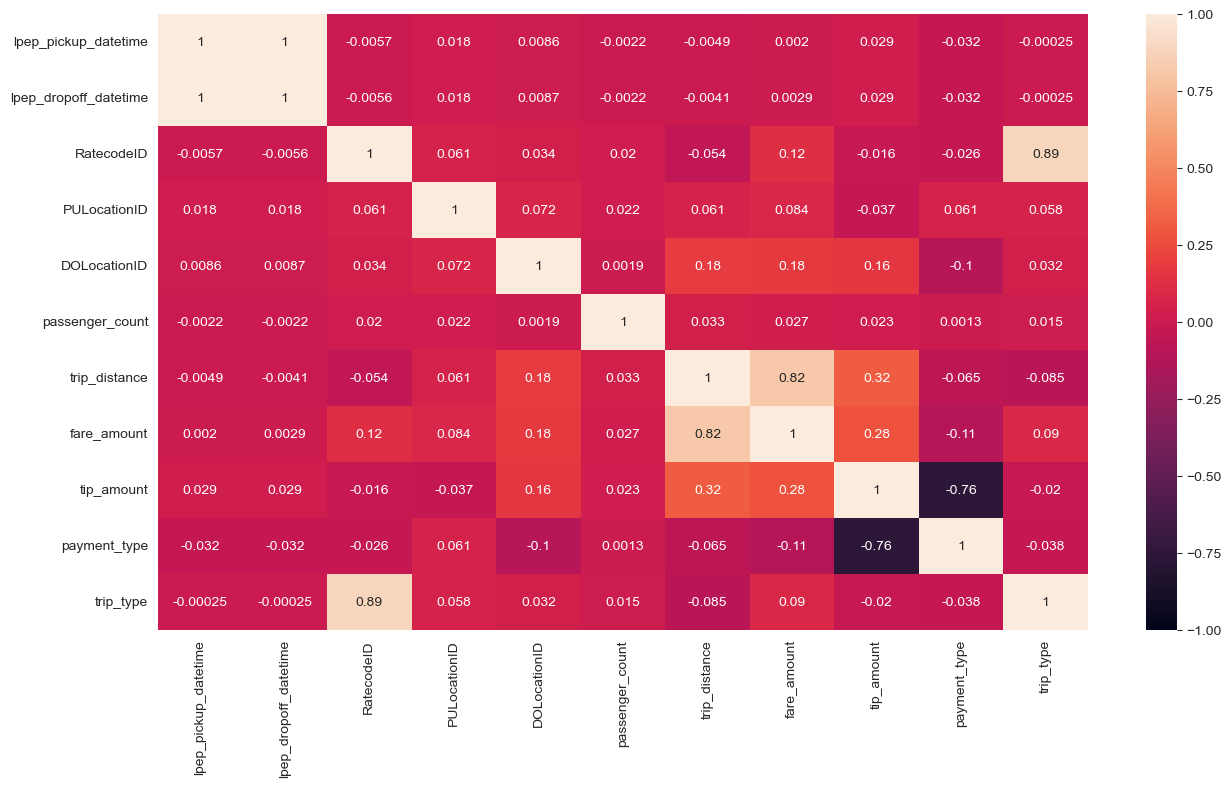

In [131]:
plt.figure(figsize=(15,8))
sns.heatmap(data_frame.corr('spearman'),vmin=-1,vmax=1,annot=True)
plt.show()

Cleaning The Data

    Duplicate Data

In [13]:
data_frame[data_frame.duplicated()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
30233,2023-01-16 03:39:38,2023-01-16 03:54:12,1.0,235,78,1.0,2.34,0.0,0.0,2.0,1.0,Bronx,University Heights/Morris Heights,Bronx,East Tremont
30248,2023-01-16 04:11:30,2023-01-16 04:12:44,1.0,78,78,1.0,0.17,0.0,0.0,2.0,1.0,Bronx,East Tremont,Bronx,East Tremont
36901,2023-01-19 13:49:39,2023-01-19 14:40:05,1.0,43,23,1.0,24.14,0.0,0.0,2.0,1.0,Manhattan,Central Park,Staten Island,Bloomfield/Emerson Hill


In [14]:
data_frame.drop_duplicates(inplace=True)
data_frame[data_frame.duplicated()].sum()

lpep_pickup_datetime       0
lpep_dropoff_datetime      0
RatecodeID               0.0
PULocationID               0
DOLocationID               0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
payment_type             0.0
trip_type                0.0
PUBorough                  0
PUZone                     0
DOBorough                  0
DOZone                     0
dtype: object

In [15]:
duplicate_value = data_frame[data_frame.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
duplicate_value

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
663,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
899,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,0.0,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,2.5,0.0,3.0,1.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,-3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63808,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63868,2023-01-31 23:44:44,2023-01-31 23:45:15,5.0,264,264,1.0,0.00,-10.0,0.0,4.0,2.0,Unknown,NV,Unknown,NV


In [16]:
duplicate_negative_value = duplicate_value[data_frame['fare_amount']<0]
duplicate_negative_value

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,0.0,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
1686,2023-01-02 12:56:53,2023-01-02 13:00:10,1.0,75,75,1.0,0.77,-4.5,0.0,4.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
1864,2023-01-02 13:51:33,2023-01-02 13:52:42,1.0,75,75,2.0,0.08,-3.7,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2023-01-31 18:39:16,2023-01-31 18:39:29,1.0,130,130,3.0,0.05,-3.0,0.0,4.0,1.0,Queens,Jamaica,Queens,Jamaica
63544,2023-01-31 19:06:18,2023-01-31 19:06:46,1.0,75,75,2.0,0.08,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
63655,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,-2.5,0.0,3.0,1.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,-3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)


In [17]:
data_frame.drop(duplicate_negative_value.index, inplace=True)

In [18]:
data_frame[data_frame.duplicated(subset=['lpep_pickup_datetime','lpep_dropoff_datetime','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance'])]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


    Negative Values

In [19]:
pd.DataFrame({
    'feature':data_frame.columns.values,
    'negative_value_in_percentage_(%)':[len(data_frame[col][data_frame[col] < 0])/len(data_frame)*100 if np.issubdtype(data_frame[col].dtype,np.number) else 0 for col in data_frame.columns]
}).round(3)

,feature,negative_value_in_percentage_(%)
0,lpep_pickup_datetime,0.000
1,lpep_dropoff_datetime,0.000
2,RatecodeID,0.000
3,PULocationID,0.000
4,DOLocationID,0.000
5,passenger_count,0.000
6,trip_distance,0.000
7,fare_amount,0.007
8,tip_amount,0.000
9,payment_type,0.000


In [20]:
negative_value = data_frame[data_frame['fare_amount']<0]
data_frame.loc[negative_value.index,'fare_amount'] = data_frame['fare_amount'].abs()

    Zero Values

In [21]:
pd.DataFrame({
    'feature':data_frame.columns.values,
    'data_type':data_frame.dtypes.values,
    'zero/0_value_in_precentage_(%)':[len(data_frame[col][data_frame[col] == 0])/len(data_frame)*100 if np.issubdtype(data_frame[col].dtype,np.number) else 0 for col in data_frame.columns]
}).round(3)

,feature,data_type,zero/0_value_in_precentage_(%)
0,lpep_pickup_datetime,object,0.000
1,lpep_dropoff_datetime,object,0.000
2,RatecodeID,float64,0.000
3,PULocationID,int64,0.000
4,DOLocationID,int64,0.000
5,passenger_count,float64,0.494
6,trip_distance,float64,4.822
7,fare_amount,float64,0.118
8,tip_amount,float64,42.117
9,payment_type,float64,0.000


In [22]:
data_frame['passenger_count'] = data_frame['passenger_count'].replace(0,data_frame['passenger_count'].median())
data_frame = data_frame[data_frame['trip_distance']>0]
data_frame = data_frame[data_frame['fare_amount']>0]

    Missing Value

In [23]:
pd.DataFrame({
    'feature': data_frame.columns.values,
    'data_type': data_frame.dtypes.values,
    'null_value_in_percentage_(%)': data_frame.isna().mean().values*100
}).round(3)

,feature,data_type,null_value_in_percentage_(%)
0,lpep_pickup_datetime,object,0.000
1,lpep_dropoff_datetime,object,0.000
2,RatecodeID,float64,6.443
3,PULocationID,int64,0.000
4,DOLocationID,int64,0.000
5,passenger_count,float64,6.443
6,trip_distance,float64,0.000
7,fare_amount,float64,0.000
8,tip_amount,float64,0.000
9,payment_type,float64,6.443


In [24]:
data_frame['RatecodeID'].value_counts()

RatecodeID
1.0     59400
5.0       955
2.0       131
4.0        53
3.0        20
99.0       10
Name: count, dtype: int64

In [25]:
data_frame[data_frame['RatecodeID']==4][['PUBorough','DOBorough']].value_counts()

PUBorough  DOBorough
Queens     Unknown      37
Manhattan  Unknown       7
Bronx      Unknown       2
Manhattan  Manhattan     2
Unknown    Unknown       2
Brooklyn   Unknown       1
Manhattan  EWR           1
Unknown    Queens        1
Name: count, dtype: int64

In [26]:
data_frame.loc[(data_frame['RatecodeID']==4)&(data_frame['PUBorough']!='Unknown')&(data_frame['DOBorough']=='EWR'),'RatecodeID'] = 3
data_frame.loc[(data_frame['RatecodeID']==4)&(data_frame['PUBorough']!='Unknown')&(data_frame['DOBorough']!='Unknown'),'RatecodeID'] = 1

In [27]:
data_frame.drop(data_frame[data_frame['PUBorough']=='Unknown'].index,inplace=True)
data_frame.drop(data_frame[data_frame['DOBorough']=='Unknown'].index,inplace=True)

In [28]:
data_frame['RatecodeID'] = data_frame['RatecodeID'].replace(99, np.nan)
data_frame.loc[(data_frame['PUBorough']=='Manhattan')&(data_frame['DOZone']=='JFK Airport')&(data_frame['RatecodeID'].isna()),'RatecodeID'] = 2
data_frame.loc[(data_frame['PUZone']=='JFK Airport')&(data_frame['DOBorough']=='Manhattan')&(data_frame['RatecodeID'].isna()),'RatecodeID'] = 2
data_frame.loc[(data_frame['DOZone']=='Newark Airport')&(data_frame['RatecodeID'].isna()),'RatecodeID'] = 3

In [29]:
data_frame['RatecodeID'].fillna(1,inplace=True)
print(data_frame['RatecodeID'].value_counts())
print('Total NaN values: ',len(data_frame[data_frame['RatecodeID'].isna()]))

RatecodeID
1.0    63327
5.0      878
2.0      170
3.0       16
Name: count, dtype: int64
Total NaN values:  0


In [30]:
data_frame['passenger_count'].fillna(data_frame['passenger_count'].median(),inplace=True)

print(data_frame['passenger_count'].value_counts())
print('Total NaN values: ',len(data_frame[data_frame['passenger_count'].isna()]))

passenger_count
1.0    55486
2.0     4870
5.0     1746
6.0     1033
3.0      897
4.0      356
7.0        2
8.0        1
Name: count, dtype: int64
Total NaN values:  0


In [31]:
print(data_frame['payment_type'].value_counts())
print('Total NaN values: ',len(data_frame[data_frame['payment_type'].isna()]))

payment_type
1.0    38278
2.0    21690
3.0      221
4.0       49
Name: count, dtype: int64
Total NaN values:  4153


In [32]:
data_frame[(data_frame['tip_amount']>0)]['payment_type'].value_counts()

payment_type
1.0    34706
2.0        1
Name: count, dtype: int64

In [33]:
data_frame.loc[data_frame['payment_type'].isna(),'payment_type'] = data_frame['tip_amount'].apply(lambda x: 1.0 if x > 0.0 else 5.0)
data_frame['payment_type'].value_counts()

payment_type
1.0    41993
2.0    21690
5.0      438
3.0      221
4.0       49
Name: count, dtype: int64

In [34]:
data_frame.groupby(['RatecodeID','trip_type']).agg(total=('trip_type','count'))

total
RatecodeID trip_type       
1.0        1.0        59205
           2.0            2
2.0        1.0          129
3.0        1.0           15
5.0        1.0          111
           2.0          767

In [35]:
data_frame[data_frame['trip_type'].isna()].groupby('RatecodeID').agg(total=('RatecodeID','count'))

,total
RatecodeID,
1.0,4120
2.0,41
3.0,1


In [36]:
data_frame['trip_type'].fillna(1,inplace=True)
data_frame['trip_type'].value_counts()

trip_type
1.0    63622
2.0      769
Name: count, dtype: int64

In [37]:
print('Total data:',len(data_frame))
data_frame.head()

Total data: 64391


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2023-01-01 00:53:31,2023-01-01 01:11:04,1.0,41,262,1.0,2.78,17.7,0.00,2.0,1.0,Manhattan,Central Harlem,Manhattan,Yorkville East


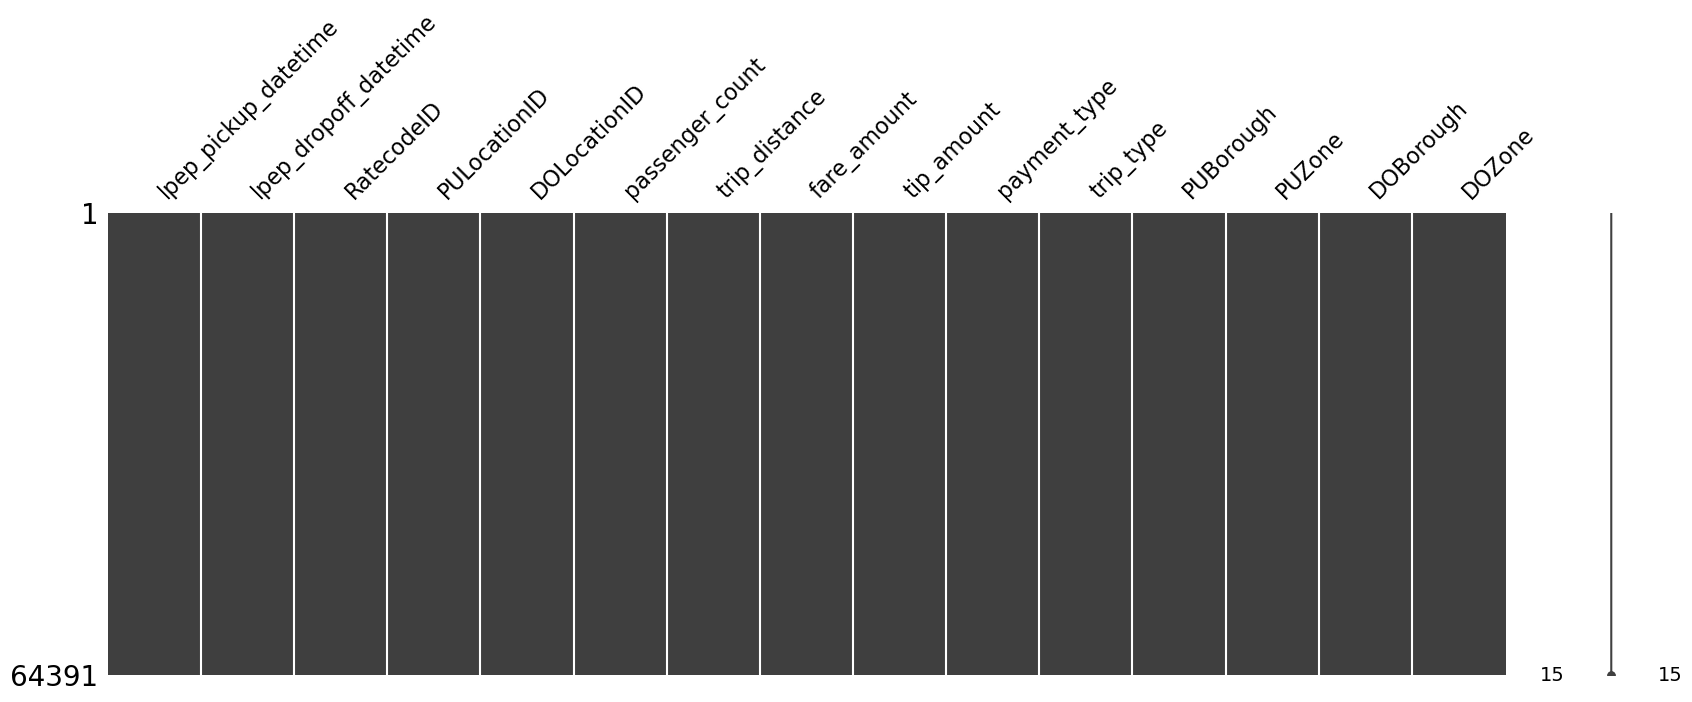

In [38]:
msno.matrix(data_frame,figsize=(20,6))
plt.show()

Handling The Formatting and Outliers

        Pick up and Drop off Datetime

In [39]:
data_frame['lpep_pickup_datetime'] = pd.to_datetime(data_frame['lpep_pickup_datetime'])
data_frame['lpep_dropoff_datetime'] = pd.to_datetime(data_frame['lpep_dropoff_datetime'])

In [40]:
outliers = data_frame[(data_frame['lpep_pickup_datetime'].dt.month!=1)|(data_frame['lpep_pickup_datetime'].dt.year!=2023)]
outliers

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
298,2022-12-09 14:10:49,2022-12-09 14:22:26,1.0,7,56,1.0,5.37,16.0,0.00,2.0,1.0,Queens,Astoria,Queens,Corona
318,2022-12-09 14:55:42,2022-12-09 15:33:06,1.0,260,164,1.0,5.48,25.5,0.00,2.0,1.0,Queens,Woodside,Manhattan,Midtown South
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,65,178,1.0,7.72,34.5,7.20,1.0,1.0,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,5.0,82,198,2.0,4.58,28.0,5.66,1.0,2.0,Queens,Elmhurst,Queens,Ridgewood


In [41]:
data_frame.drop(outliers.index,inplace=True)

In [42]:
data_frame[(data_frame['lpep_pickup_datetime'].dt.month!=1)|(data_frame['lpep_pickup_datetime'].dt.year!=2023)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


In [43]:
time_bins = [0,5,11,15,20,24] 
time_labels = ['Midnight','Morning','Noon','Evening','Night']
data_frame['pickup_time'] = pd.cut(data_frame['lpep_pickup_datetime'].dt.hour,bins=time_bins,labels=time_labels,right=False)

data_frame['day_category'] = data_frame['lpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

    RatecodeID

In [44]:
data_frame['RatecodeID'] = data_frame['RatecodeID'].replace({1:'Standard rate', 2:'JFK Airport', 3:'Newark Airport', 4:'Nassau or Westchester', 5:'Negotiated fare', 6:'Group ride'})
data_frame['RatecodeID'].value_counts()

RatecodeID
Standard rate      63324
Negotiated fare      877
JFK Airport          170
Newark Airport        16
Name: count, dtype: int64

    Passangers Count

In [45]:
data_frame['passenger_count'].value_counts()

passenger_count
1.0    55483
2.0     4869
5.0     1746
6.0     1033
3.0      897
4.0      356
7.0        2
8.0        1
Name: count, dtype: int64

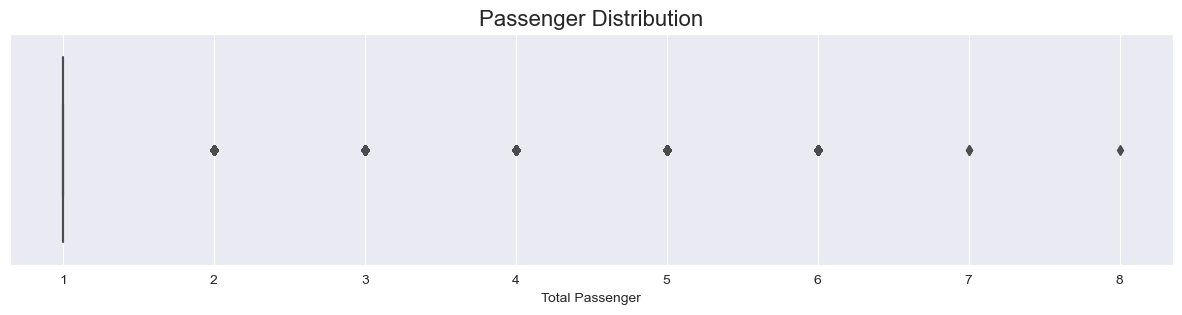

In [46]:
plt.figure(figsize=(15,3))

sns.set_style("darkgrid")

sns.boxplot(data=data_frame, x='passenger_count', color='red')
plt.xlabel('Total Passenger')
plt.title('Passenger Distribution', fontsize=16)

plt.show()

In [47]:
data_frame['passenger_count'] = data_frame['passenger_count'].apply(lambda x: '>3' if x>3 else str(x))
data_frame['passenger_count'].value_counts()

passenger_count
1.0    55483
2.0     4869
>3      3138
3.0      897
Name: count, dtype: int64

    Trip Distance

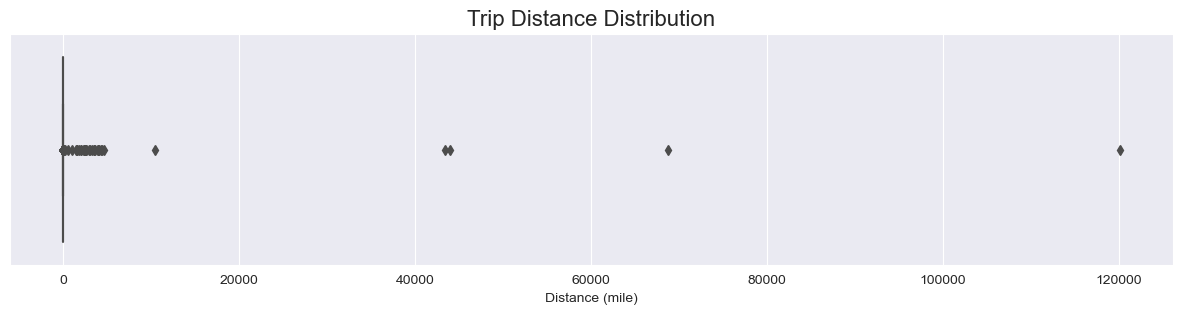

In [48]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=data_frame, x='trip_distance', color='red')
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution', fontsize=16)

plt.show()

In [49]:
print('Data perjalanan lebih dari 1 km (0,62 miles):',len(data_frame[data_frame['trip_distance']<0.62]))
data_frame = data_frame[data_frame['trip_distance']>0.62]

Data perjalanan lebih dari 1 km (0,62 miles): 3465


In [50]:
data_frame[data_frame['trip_distance']>50][['lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID','DOLocationID','trip_distance','fare_amount']].sort_values(by='trip_distance',ascending=True).head()

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount
7322,2023-01-05 09:00:03,2023-01-05 15:18:38,134,134,66.18,15.00
64695,2023-01-06 14:16:00,2023-01-06 14:59:00,82,130,137.95,44.90
66580,2023-01-20 09:16:00,2023-01-20 09:59:00,133,90,254.65,45.44
63995,2023-01-01 12:35:00,2023-01-01 12:58:00,181,137,579.63,28.49
65149,2023-01-10 15:40:00,2023-01-10 16:24:00,26,37,1082.45,49.80


In [51]:
outliers = data_frame[data_frame['trip_distance']>50][['PULocationID','DOLocationID','trip_distance']]
print('Total outliers:',len(outliers))
outliers.head()

Total outliers: 38


,PULocationID,DOLocationID,trip_distance
7322,134,134,66.18
33373,82,236,1571.97
63995,181,137,579.63
64446,193,140,2555.47
64558,49,65,3077.89


In [52]:
median_distance_using_id = data_frame[data_frame['trip_distance']<50].groupby(['PULocationID','DOLocationID']).agg(count=('trip_distance', 'count'),
                                                                                                               avg_distance=('trip_distance', 'mean'),
                                                                                                               median_distance=('trip_distance', 'median')).reset_index()
median_distance_using_id.sample(7, random_state=3)

,PULocationID,DOLocationID,count,avg_distance,median_distance
4180,220,127,2,8.5950,8.595
1947,80,87,2,6.5800,6.580
4548,244,92,1,13.2200,13.220
4112,212,248,1,0.6600,0.660
737,41,120,4,2.7625,2.775
3833,189,17,2,1.6900,1.690
285,25,24,2,11.2100,11.210


In [53]:
distance_using_id = pd.merge(outliers, median_distance_using_id,on=['PULocationID','DOLocationID'],how='left')
distance_using_id.drop(columns='count',axis=1,inplace=True)
distance_using_id.index = outliers.index
display(distance_using_id.head(5))

print('Hasil Perubahan:')
data_frame.loc[outliers.index,'trip_distance'] = distance_using_id['median_distance']
data_frame.loc[outliers.index][['PULocationID','DOLocationID','trip_distance']].head()

,PULocationID,DOLocationID,trip_distance,avg_distance,median_distance
7322,134,134,66.18,1.129205,0.910
33373,82,236,1571.97,8.023333,8.080
63995,181,137,579.63,7.460000,7.460
64446,193,140,2555.47,2.410000,2.470
64558,49,65,3077.89,1.025000,1.025


Hasil Perubahan:


,PULocationID,DOLocationID,trip_distance
7322,134,134,0.910
33373,82,236,8.080
63995,181,137,7.460
64446,193,140,2.470
64558,49,65,1.025


In [54]:
is_na_in_distance = data_frame.loc[data_frame['trip_distance'].isna()][['PUBorough','DOBorough','trip_distance']]
is_na_in_distance

,PUBorough,DOBorough,trip_distance
65149,Brooklyn,Brooklyn,NaN
65306,Brooklyn,Queens,NaN
65491,Bronx,Manhattan,NaN
66344,Brooklyn,Brooklyn,NaN
66580,Brooklyn,Manhattan,NaN
66724,Manhattan,Bronx,NaN
67307,Bronx,Bronx,NaN


In [55]:
median_distance_using_borough = data_frame[data_frame['trip_distance']<70].groupby(['PUBorough','DOBorough']).agg(count=('trip_distance','count'),avg_distance=('trip_distance','mean'),median_distance=('trip_distance','median')).reset_index()
median_distance_using_borough.sample(5, random_state=4)

,PUBorough,DOBorough,count,avg_distance,median_distance
20,Staten Island,Brooklyn,1,11.390000,11.39
19,Queens,Queens,14119,2.674917,1.97
0,Bronx,Bronx,519,3.085096,2.52
3,Bronx,Queens,25,12.287600,10.36
6,Brooklyn,EWR,7,15.090000,15.08


In [56]:
distance_using_borough = pd.merge(is_na_in_distance,median_distance_using_borough,on=['PUBorough','DOBorough'],how='left')
distance_using_borough.index = is_na_in_distance.index
display(distance_using_borough)

print('Hasil Perubahan:')
data_frame.loc[is_na_in_distance.index, 'trip_distance'] = distance_using_borough['median_distance'].round(2)
display(data_frame.loc[is_na_in_distance.index][['PUBorough','DOBorough','trip_distance']])

,PUBorough,DOBorough,trip_distance,count,avg_distance,median_distance
65149,Brooklyn,Brooklyn,NaN,6020,2.613547,2.015
65306,Brooklyn,Queens,NaN,438,9.387329,9.540
65491,Bronx,Manhattan,NaN,253,4.992470,3.400
66344,Brooklyn,Brooklyn,NaN,6020,2.613547,2.015
66580,Brooklyn,Manhattan,NaN,1586,5.966778,5.635
66724,Manhattan,Bronx,NaN,1430,4.113755,3.290
67307,Bronx,Bronx,NaN,519,3.085096,2.520


Hasil Perubahan:


,PUBorough,DOBorough,trip_distance
65149,Brooklyn,Brooklyn,2.01
65306,Brooklyn,Queens,9.54
65491,Bronx,Manhattan,3.40
66344,Brooklyn,Brooklyn,2.01
66580,Brooklyn,Manhattan,5.64
66724,Manhattan,Bronx,3.29
67307,Bronx,Bronx,2.52


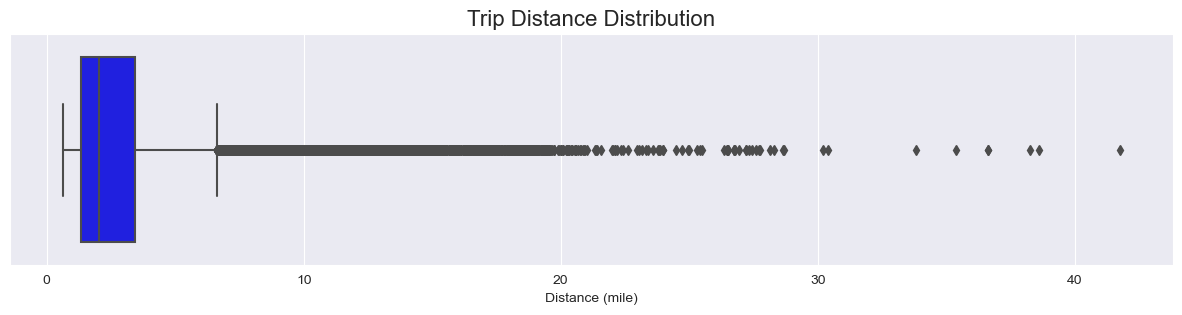

In [57]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=data_frame, x='trip_distance', color='blue')
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution', fontsize=16)

plt.show()

In [58]:
bins_of_distance = [0,2,6,10,np.inf] 
labels_of_distance = ['<2 miles','3-6 miles','7-10 miles','>10 miles']

data_frame['distance_bins'] = pd.cut(data_frame['trip_distance'],bins=bins_of_distance,labels=labels_of_distance)

In [59]:
data_frame['distance_bins'].value_counts()

distance_bins
<2 miles      29984
3-6 miles     24711
7-10 miles     4590
>10 miles      1543
Name: count, dtype: int64

Creating Feature - Trip Duration

In [60]:
difference = (data_frame['lpep_dropoff_datetime']-data_frame['lpep_pickup_datetime']).dt.total_seconds()/60
data_frame['trip_duration'] = difference.round(2)

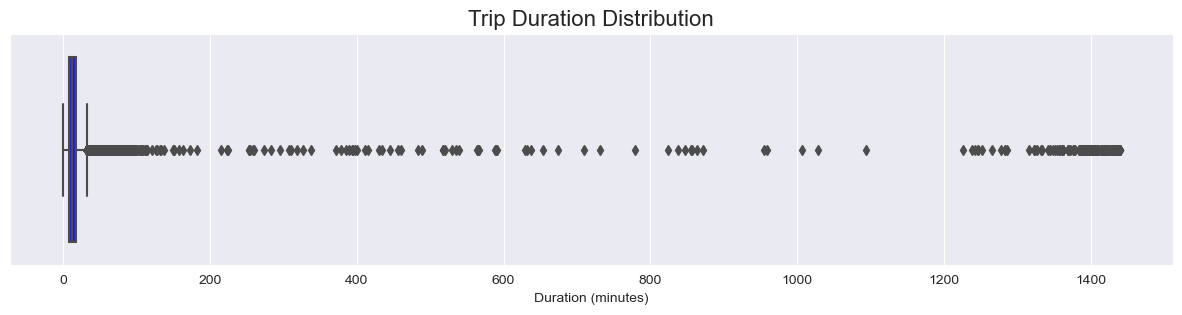

In [61]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=data_frame, x='trip_duration', color='blue')
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distribution', fontsize=16)


plt.show()

In [62]:
print('Jumlah data dengan jarak kurang dari 2 menit:',len(data_frame[data_frame['trip_duration']<=2]))
data_frame = data_frame[data_frame['trip_duration']>2]

Jumlah data dengan jarak kurang dari 2 menit: 130


In [63]:
data_frame[data_frame['trip_distance']==data_frame['trip_distance'].max()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,pickup_time,day_category,distance_bins,trip_duration
8072,2023-01-05 14:53:00,2023-01-05 16:19:20,Standard rate,130,1,1.0,41.74,114.0,0.0,1.0,1.0,Queens,Jamaica,EWR,Newark Airport,Noon,Weekdays,>10 miles,86.33


In [64]:
outliers = data_frame[data_frame['trip_duration']>250][['PULocationID','DOLocationID','lpep_pickup_datetime','lpep_dropoff_datetime','trip_duration']]
print('Total extreme outliers :', len(outliers))
outliers.head()

Total extreme outliers : 225


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,1375.47
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,1326.02
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,1383.48
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,1371.02
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,1408.23


In [65]:
median_duration_using_id = data_frame[data_frame['trip_duration']<250].groupby(['PULocationID','DOLocationID']).agg(count=('distance_bins','count'), 
                                                                                                                mean_duration=('trip_duration','mean'), 
                                                                                                                median_duration=('trip_duration','median')).reset_index()
median_duration_using_id.sample(5,random_state=3)

,PULocationID,DOLocationID,count,mean_duration,median_duration
2105,83,10,1,25.500000,25.50
1142,52,237,1,37.270000,37.27
3070,134,130,15,8.686667,8.68
2560,112,62,2,19.340000,19.34
4170,220,136,1,14.550000,14.55


In [66]:
duration_using_id = pd.merge(outliers,median_duration_using_id,on=['PULocationID','DOLocationID'],how='left')
duration_using_id.drop(columns='count', axis=1, inplace=True)
duration_using_id.index = outliers.index
display(duration_using_id.head())

print('Hasil Perubahan:')
data_frame.loc[outliers.index, 'trip_duration'] = duration_using_id['median_duration'].round(2)
data_frame.loc[outliers.index][['PULocationID','DOLocationID','lpep_pickup_datetime','lpep_dropoff_datetime','trip_duration']].head()

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,mean_duration,median_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,1375.47,24.526667,24.580
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,1326.02,12.232537,11.880
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,1383.48,22.133333,20.350
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,1371.02,12.302649,9.250
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,1408.23,23.145000,22.445


Hasil Perubahan:


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,24.58
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,11.88
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,20.35
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,9.25
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,22.44


In [67]:
is_na_in_time_duration = data_frame.loc[outliers.index][data_frame['trip_duration'].isna()][['PUBorough','DOBorough','lpep_pickup_datetime','lpep_dropoff_datetime','trip_duration']]
print('Total NaN Value :',len(is_na_in_time_duration))
is_na_in_time_duration

Total NaN Value : 13


,PUBorough,DOBorough,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
556,Queens,Queens,2023-01-01 13:07:46,2023-01-01 19:45:18,NaN
16126,Brooklyn,Brooklyn,2023-01-09 13:44:30,2023-01-10 11:07:20,NaN
29711,Brooklyn,Brooklyn,2023-01-15 17:52:52,2023-01-15 22:11:55,NaN
30240,Queens,Queens,2023-01-16 03:13:50,2023-01-17 00:00:00,NaN
40817,Queens,Manhattan,2023-01-21 03:09:37,2023-01-22 01:46:44,NaN
41975,Queens,Queens,2023-01-21 17:19:27,2023-01-22 00:00:00,NaN
42432,Brooklyn,Brooklyn,2023-01-21 20:29:58,2023-01-22 02:59:25,NaN
44216,Bronx,Bronx,2023-01-22 21:35:25,2023-01-23 20:42:11,NaN
52135,Bronx,Manhattan,2023-01-26 12:45:43,2023-01-27 00:00:00,NaN
56314,Brooklyn,Manhattan,2023-01-28 04:15:15,2023-01-29 03:58:28,NaN


In [68]:
median_duration_using_borough = data_frame[data_frame['trip_duration']<250].groupby(['PUBorough', 'DOBorough']).agg(count=('distance_bins','count'), 
                                                                                                                mean_duration=('trip_duration','mean'), 
                                                                                                                median_duration=('trip_duration','median')).reset_index()
median_duration_using_borough.sample(10, random_state=5)

,PUBorough,DOBorough,count,mean_duration,median_duration
18,Queens,Manhattan,902,26.873925,24.86
2,Bronx,Manhattan,253,20.556403,17.78
17,Queens,EWR,7,58.354286,55.33
19,Queens,Queens,14086,13.154392,11.05
20,Staten Island,Brooklyn,1,36.550000,36.55
21,Staten Island,Staten Island,7,11.918571,8.80
10,Manhattan,Bronx,1431,17.177945,15.55
5,Brooklyn,Brooklyn,6006,16.416354,13.92
1,Bronx,Brooklyn,6,40.591667,42.00
13,Manhattan,Manhattan,33758,12.402218,10.80


In [69]:
duration_using_borough = pd.merge(is_na_in_time_duration,median_duration_using_borough,on=['PUBorough','DOBorough'],how='left')
duration_using_borough.drop(columns='count',axis=1,inplace=True)
duration_using_borough.index = is_na_in_time_duration.index
display(duration_using_borough.head())

print('Hasil Perubahan:')
data_frame.loc[is_na_in_time_duration.index,'trip_duration'] = duration_using_borough['median_duration'].round(2)
data_frame.loc[is_na_in_time_duration.index][['PULocationID','DOLocationID','lpep_pickup_datetime','lpep_dropoff_datetime','trip_duration']].head()

,PUBorough,DOBorough,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,mean_duration,median_duration
556,Queens,Queens,2023-01-01 13:07:46,2023-01-01 19:45:18,NaN,13.154392,11.05
16126,Brooklyn,Brooklyn,2023-01-09 13:44:30,2023-01-10 11:07:20,NaN,16.416354,13.92
29711,Brooklyn,Brooklyn,2023-01-15 17:52:52,2023-01-15 22:11:55,NaN,16.416354,13.92
30240,Queens,Queens,2023-01-16 03:13:50,2023-01-17 00:00:00,NaN,13.154392,11.05
40817,Queens,Manhattan,2023-01-21 03:09:37,2023-01-22 01:46:44,NaN,26.873925,24.86


Hasil Perubahan:


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
556,223,8,2023-01-01 13:07:46,2023-01-01 19:45:18,11.05
16126,17,256,2023-01-09 13:44:30,2023-01-10 11:07:20,13.92
29711,150,123,2023-01-15 17:52:52,2023-01-15 22:11:55,13.92
30240,129,16,2023-01-16 03:13:50,2023-01-17 00:00:00,11.05
40817,179,114,2023-01-21 03:09:37,2023-01-22 01:46:44,24.86


In [70]:
data_frame.loc[outliers.index, 'lpep_dropoff_datetime'] = data_frame['lpep_pickup_datetime'] + pd.to_timedelta((data_frame['trip_duration']), unit='m').dt.round('S')
data_frame.loc[outliers.index][['PULocationID','DOLocationID','lpep_pickup_datetime','lpep_dropoff_datetime','trip_duration']].head()

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 00:47:39,24.58
108,260,223,2023-01-01 01:53:59,2023-01-01 02:05:52,11.88
118,129,37,2023-01-01 01:25:46,2023-01-01 01:46:07,20.35
207,129,129,2023-01-01 03:12:42,2023-01-01 03:21:57,9.25
262,65,37,2023-01-01 04:03:36,2023-01-01 04:26:02,22.44


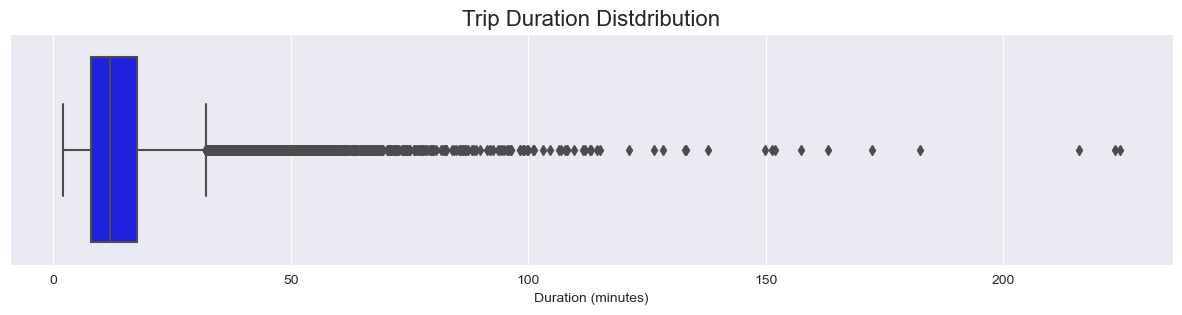

In [71]:
plt.figure(figsize=(15,3))

sns.set_style("darkgrid")

sns.boxplot(data=data_frame, x='trip_duration', color='blue')
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distdribution', fontsize=16)

plt.show()

In [72]:
bins_of_duration = [0,10,20,30,np.inf] 
labels_of_duration = ['<10 minutes','11-20 minutes','21-30 minutes','>30 minutes']

data_frame['duration_bins'] = pd.cut(data_frame['trip_duration'],bins=bins_of_duration,labels=labels_of_duration)

In [73]:
data_frame['duration_bins'].value_counts()

duration_bins
11-20 minutes    26030
<10 minutes      23321
21-30 minutes     7711
>30 minutes       3636
Name: count, dtype: int64

Creating Features - Driving Speed

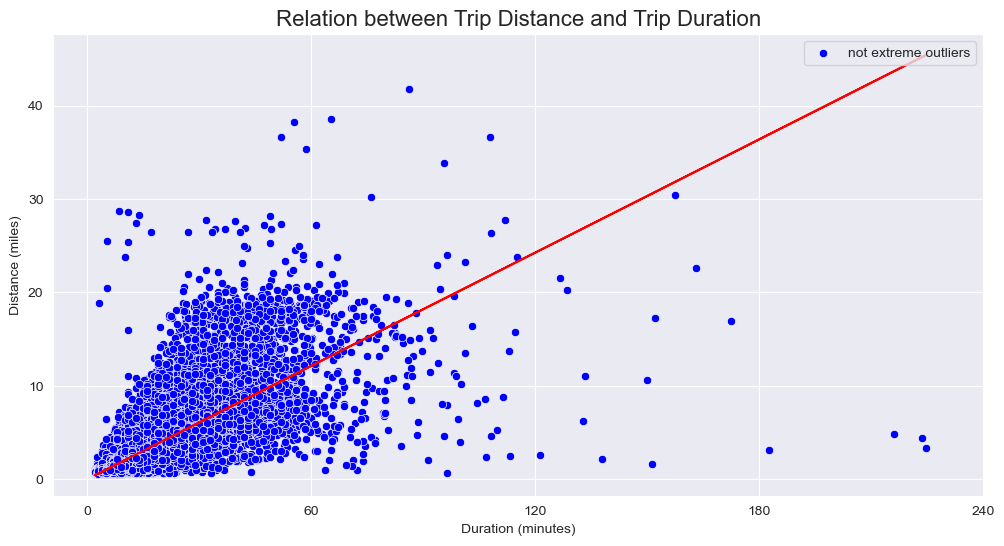

In [74]:
plt.figure(figsize=(12,6))

sns.scatterplot(data_frame, x='trip_duration', y='trip_distance', color='blue', label='not extreme outliers')

x, y = data_frame['trip_duration'], data_frame['trip_distance'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 241, 60))
plt.legend(loc ="upper right", prop={'size': 10})
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)
plt.show()

In [75]:
data_frame['speed'] = (data_frame['trip_distance'] / (data_frame['trip_duration']/60)).round(2)

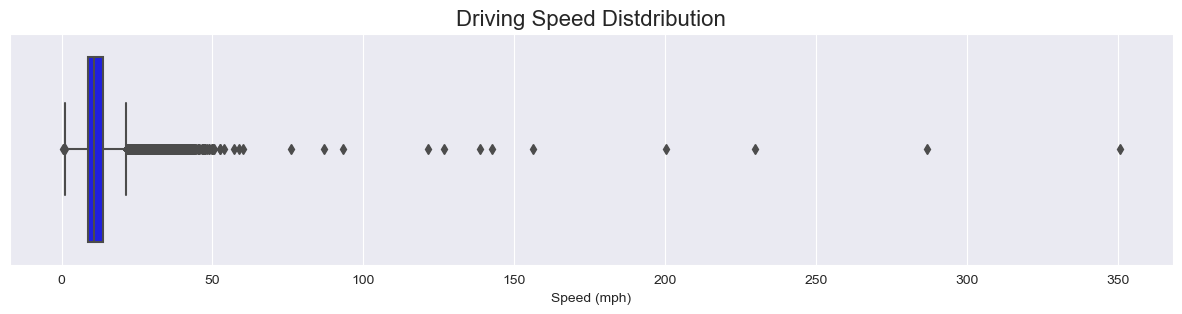

In [76]:
plt.figure(figsize=(15,3))

sns.set_style("darkgrid")

sns.boxplot(data=data_frame, x='speed', color='blue')
plt.xlabel('Speed (mph)')
plt.title('Driving Speed Distdribution',fontsize=16)

plt.show()

In [77]:
outliers = data_frame[(data_frame['speed']<5) | (data_frame['speed']>70)][['lpep_pickup_datetime','lpep_dropoff_datetime','trip_distance','distance_bins','trip_duration','duration_bins','speed']]
print('Total extreme outliers :',len(outliers))
outliers.sort_values(by='speed',ascending=True).head()

Total extreme outliers : 903


,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_bins,trip_duration,duration_bins,speed
60667,2023-01-30 14:55:13,2023-01-30 16:31:28,0.64,<2 miles,96.25,>30 minutes,0.40
21587,2023-01-11 21:28:35,2023-01-12 00:00:00,1.63,<2 miles,151.42,>30 minutes,0.65
17029,2023-01-09 19:38:56,2023-01-09 20:51:12,1.03,<2 miles,72.27,>30 minutes,0.86
23872,2023-01-12 20:15:27,2023-01-13 00:00:00,3.32,3-6 miles,224.55,>30 minutes,0.89
23993,2023-01-12 21:42:06,2023-01-13 00:00:00,2.14,3-6 miles,137.90,>30 minutes,0.93


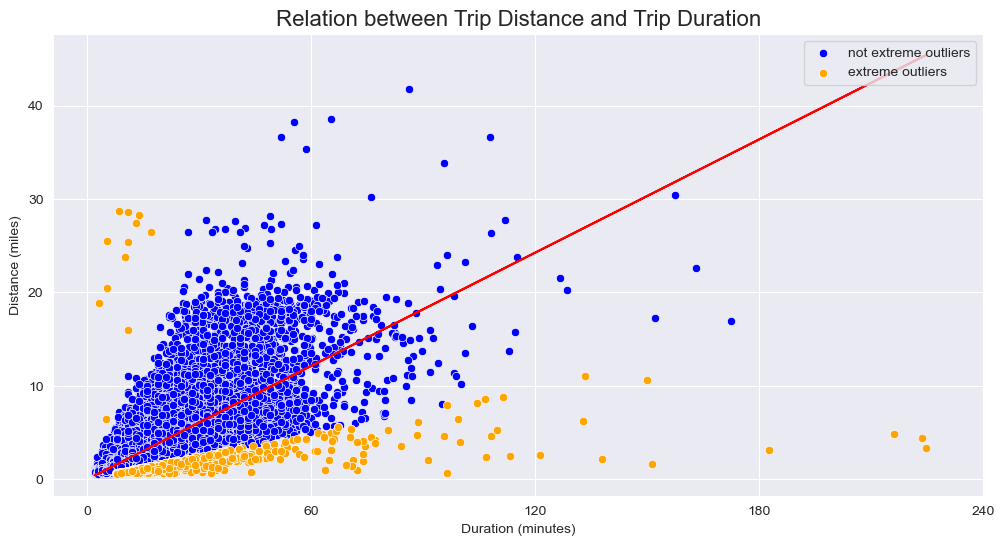

In [79]:
plt.figure(figsize=(12,6))

sns.scatterplot(data_frame,x='trip_duration',y='trip_distance',color='blue',label='not extreme outliers')
sns.scatterplot(outliers,x='trip_duration',y='trip_distance',color='orange',label='extreme outliers')

x,y = data_frame['trip_duration'],data_frame['trip_distance'] 
m,b = np.polyfit(x,y,1)
plt.plot(x,m*x + b,color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0,241,60))
plt.legend(loc ="upper right",prop={'size': 10})
plt.title('Relation between Trip Distance and Trip Duration',fontsize=16)
plt.show()

In [80]:
median_duration = data_frame.loc[~data_frame.index.isin(outliers.index)].groupby('distance_bins').agg(count=('distance_bins','count'),avg_speed=('speed','mean'), median_speed=('speed','median')).reset_index()
median_duration

,distance_bins,count,avg_speed,median_speed
0,<2 miles,29168,10.153661,9.710
1,3-6 miles,24526,12.531054,11.430
2,7-10 miles,4571,18.964509,18.070
3,>10 miles,1530,23.496196,22.295


In [81]:
new_duration = pd.merge(outliers, median_duration,on='distance_bins',how='left')
new_duration.index = outliers.index
new_duration.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_bins,trip_duration,duration_bins,speed,count,avg_speed,median_speed
207,2023-01-01 03:12:42,2023-01-01 03:21:57,0.72,<2 miles,9.25,<10 minutes,4.67,29168,10.153661,9.710
545,2023-01-01 12:53:04,2023-01-01 14:10:09,4.26,3-6 miles,77.08,>30 minutes,3.32,24526,12.531054,11.430
556,2023-01-01 13:07:46,2023-01-01 13:18:49,16.00,>10 miles,11.05,11-20 minutes,86.88,1530,23.496196,22.295
648,2023-01-01 13:34:51,2023-01-01 13:59:58,1.86,<2 miles,25.12,21-30 minutes,4.44,29168,10.153661,9.710
769,2023-01-01 15:33:05,2023-01-01 16:03:34,1.15,<2 miles,30.48,>30 minutes,2.26,29168,10.153661,9.710


In [82]:
data_frame.loc[outliers.index,'speed'] = new_duration['median_speed'].round(2)

time_duration = (data_frame['trip_distance'] / data_frame['speed']) * 60
data_frame.loc[outliers.index,'trip_duration'] = time_duration.round(2)
data_frame.loc[outliers.index,'duration_bins'] = pd.cut(data_frame['trip_duration'], bins=bins_of_duration, labels=labels_of_duration)

data_frame.loc[outliers.index,'lpep_dropoff_datetime'] = data_frame['lpep_pickup_datetime'] + pd.to_timedelta((data_frame['trip_duration']),unit='m').dt.round('S')
data_frame.loc[outliers.index][['lpep_pickup_datetime','lpep_dropoff_datetime','trip_distance','distance_bins','trip_duration','duration_bins','speed']].head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_bins,trip_duration,duration_bins,speed
207,2023-01-01 03:12:42,2023-01-01 03:17:09,0.72,<2 miles,4.45,<10 minutes,9.71
545,2023-01-01 12:53:04,2023-01-01 13:15:26,4.26,3-6 miles,22.36,21-30 minutes,11.43
556,2023-01-01 13:07:46,2023-01-01 13:50:49,16.00,>10 miles,43.05,>30 minutes,22.30
648,2023-01-01 13:34:51,2023-01-01 13:46:20,1.86,<2 miles,11.49,11-20 minutes,9.71
769,2023-01-01 15:33:05,2023-01-01 15:40:12,1.15,<2 miles,7.11,<10 minutes,9.71


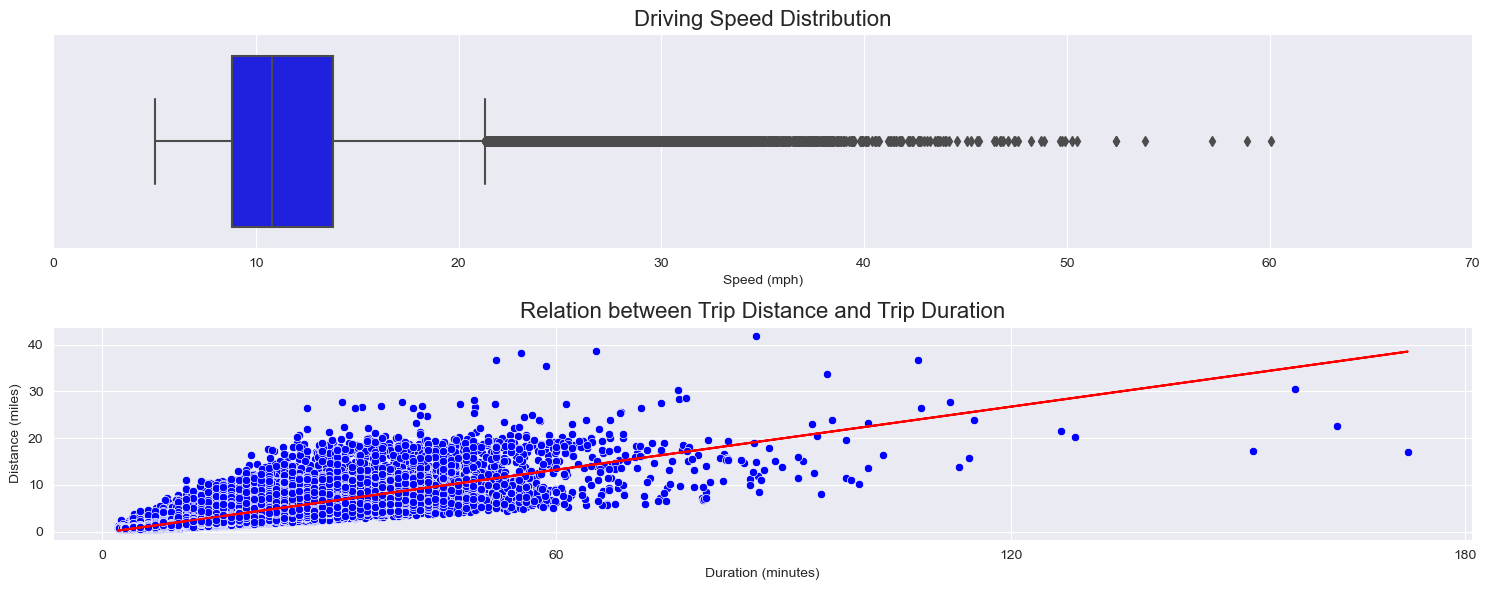

In [83]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)
sns.boxplot(data=data_frame,x='speed',color='blue')
plt.xlabel('Speed (mph)')
plt.xticks(np.arange(0,71,10))
plt.title('Driving Speed Distribution',fontsize=16)

plt.subplot(2, 1, 2)
sns.scatterplot(data_frame,x='trip_duration',y='trip_distance',color='blue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0,181,60))
plt.title('Relation between Trip Distance and Trip Duration',fontsize=16)

x,y = data_frame['trip_duration'], data_frame['trip_distance'] 
m,b = np.polyfit(x,y,1)
plt.plot(x,m*x + b,color='red')


plt.tight_layout()
plt.show()

In [84]:
bins_of_speed = [0,10,20,30,np.inf]
labels_of_speed = ['<10 mph','11-20 mph','21-30 mph','>30 mph']
data_frame['speed_bins'] = pd.cut(data_frame['speed'], bins=bins_of_speed,labels=labels_of_speed)

In [85]:
data_frame['speed_bins'].value_counts()

speed_bins
11-20 mph    30919
<10 mph      24913
21-30 mph     4148
>30 mph        718
Name: count, dtype: int64

Amount

    Fare Amount

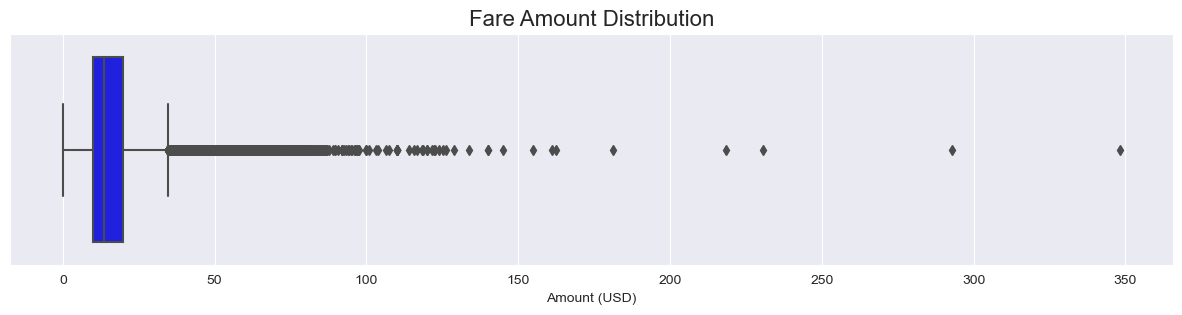

In [87]:
plt.figure(figsize=(15,3))

sns.boxplot(data=data_frame, x='fare_amount',color='blue')
plt.xlabel('Amount (USD)')
plt.title('Fare Amount Distribution',fontsize=16)

plt.show()

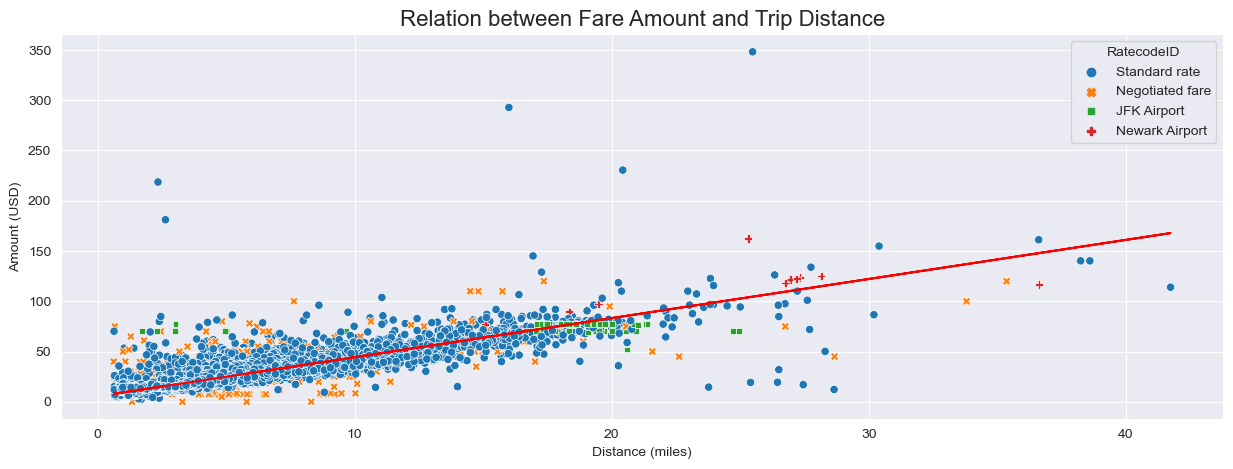

In [88]:
plt.figure(figsize=(15,5))

sns.scatterplot(data_frame,x='trip_distance',y='fare_amount',hue='RatecodeID',style='RatecodeID')
plt.xlabel('Distance (miles)')
plt.ylabel('Amount (USD)')
plt.title('Relation between Fare Amount and Trip Distance',fontsize=16)

x, y = data_frame['trip_distance'],data_frame['fare_amount'] 
m, b = np.polyfit(x,y,1)
plt.plot(x,m*x + b,color='red')

plt.show()

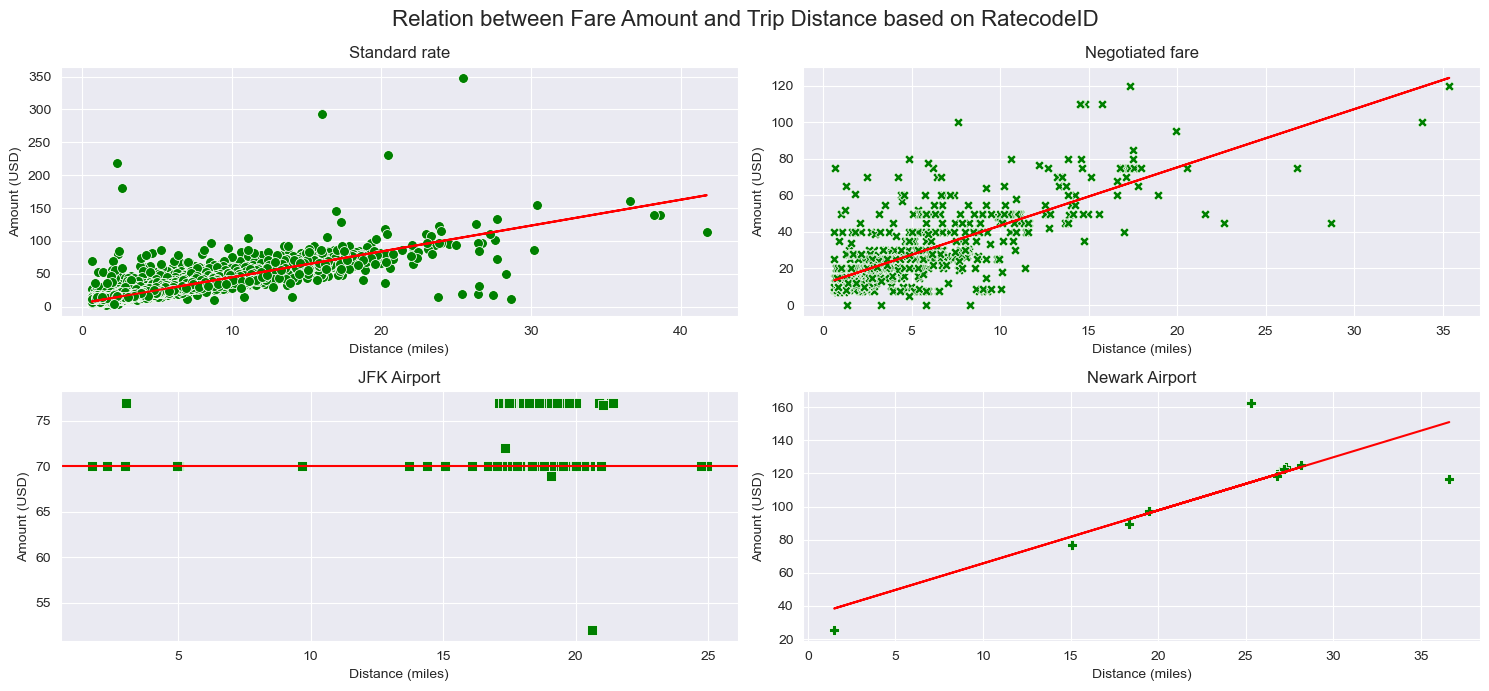

In [89]:
plt.figure(figsize=(15,7))
plt.suptitle('Relation between Fare Amount and Trip Distance based on RatecodeID', fontsize=16)

markers=['o','X','s','P']
for i, val in enumerate(data_frame['RatecodeID'].unique()):
    subset = data_frame[data_frame['RatecodeID'] == val]
    x = subset['trip_distance']
    y = subset['fare_amount']

    plt.subplot(2,2,i+1)
    sns.scatterplot(x=x, y=y,color='green',marker=markers[i],s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')
    if val == 'JFK Airport':
        plt.axhline(y=70, color='red') 
        continue
    else:
        m,b = np.polyfit(x,y,1)
        plt.plot(x,m*x + b,color='red')
    
plt.tight_layout()
plt.show()

In [91]:


mask_standard_rate_1 = ((data_frame['RatecodeID']=='Standard rate') & (data_frame['fare_amount']>120) & (data_frame['trip_distance']<20))
mask_standard_rate_2 = ((data_frame['RatecodeID']=='Standard rate') & (data_frame['fare_amount']<60) & (data_frame['trip_distance']>20))
mask_standard_rate_3 = ((data_frame['RatecodeID']=='Standard rate') & (data_frame['fare_amount']>150) & (data_frame['trip_distance']<30))
standard_rate_outlier = data_frame[mask_standard_rate_1 | mask_standard_rate_2 | mask_standard_rate_3]


mask_nego_fare_1 = ((data_frame['RatecodeID']=='Negotiated fare') & (data_frame['fare_amount']>99) & (data_frame['trip_distance']<20))
mask_nego_fare_2 = ((data_frame['RatecodeID']=='Negotiated fare') & (data_frame['fare_amount']<5) & (data_frame['trip_distance']<10))
mask_nego_fare_3 = ((data_frame['RatecodeID']=='Negotiated fare') & (data_frame['fare_amount']<60) & (data_frame['trip_distance']>20))
mask_nego_fare_4 = ((data_frame['RatecodeID']=='Negotiated fare') & (data_frame['fare_amount']>60) & (data_frame['trip_distance']<10))
nego_fare_outlier = data_frame[mask_nego_fare_1 | mask_nego_fare_2 | mask_nego_fare_3 | mask_nego_fare_4]


mask_jfk = (data_frame['RatecodeID']=='JFK Airport') & (data_frame['fare_amount']<70)
jfk_outlier = data_frame[mask_jfk]


mask_ewr = (data_frame['RatecodeID']=='Newark Airport') & (data_frame['fare_amount']>160)
ewr_outlier = data_frame[mask_ewr]
outliers = pd.concat([standard_rate_outlier, nego_fare_outlier,jfk_outlier,ewr_outlier])

print('Total standard rate outlier:',len(standard_rate_outlier))
print('Total negotiated rate outlier:',len(nego_fare_outlier))
print('Total JFK airport outlier:',len(jfk_outlier))
print('Total Newark airport outlier:',len(ewr_outlier))
print('Total all outlier:',len(outliers))

outliers = outliers[['RatecodeID', 'distance_bins', 'fare_amount']]

outliers.head()

Total standard rate outlier: 16
Total negotiated rate outlier: 24
Total JFK airport outlier: 2
Total Newark airport outlier: 1
Total all outlier: 43


,RatecodeID,distance_bins,fare_amount
556,Standard rate,>10 miles,292.8
2014,Standard rate,3-6 miles,218.6
7731,Standard rate,>10 miles,348.1
10393,Standard rate,>10 miles,59.0
12615,Standard rate,>10 miles,230.5


In [92]:
median_amount = data_frame[~data_frame.index.isin(outliers.index)].groupby(['RatecodeID', 'distance_bins']).agg(count=('fare_amount', 'count'), avg_fare=('fare_amount', 'mean'), median_fare=('fare_amount', 'median')).reset_index()
median_amount.head()

,RatecodeID,distance_bins,count,avg_fare,median_fare
0,JFK Airport,<2 miles,1,70.000000,70.0
1,JFK Airport,3-6 miles,6,71.166667,70.0
2,JFK Airport,7-10 miles,1,70.000000,70.0
3,JFK Airport,>10 miles,142,71.885634,70.0
4,Negotiated fare,<2 miles,145,15.053034,12.0


In [93]:
new_fare = pd.merge(outliers,median_amount,on=['RatecodeID','distance_bins'],how='left')
new_fare.drop(columns='count',inplace=True)
new_fare.index = outliers.index
display(new_fare.sample(10))

data_frame.loc[outliers.index,'fare_amount'] = new_fare['median_fare']
display(data_frame.loc[outliers.index][['RatecodeID','distance_bins','fare_amount']].head())

,RatecodeID,distance_bins,fare_amount,avg_fare,median_fare
25053,Negotiated fare,>10 miles,50.00,57.417241,50.00
65683,Standard rate,3-6 miles,181.07,19.013796,17.70
65416,Standard rate,>10 miles,32.00,55.668297,52.17
2643,Negotiated fare,<2 miles,75.00,15.053034,12.00
65001,Standard rate,>10 miles,19.46,55.668297,52.17
43717,Negotiated fare,<2 miles,0.15,15.053034,12.00
57763,Negotiated fare,7-10 miles,100.00,32.940734,30.00
182,Negotiated fare,3-6 miles,80.00,22.160000,20.00
64751,Standard rate,>10 miles,19.30,55.668297,52.17
67317,Standard rate,>10 miles,17.05,55.668297,52.17


,RatecodeID,distance_bins,fare_amount
556,Standard rate,>10 miles,52.17
2014,Standard rate,3-6 miles,17.70
7731,Standard rate,>10 miles,52.17
10393,Standard rate,>10 miles,52.17
12615,Standard rate,>10 miles,52.17


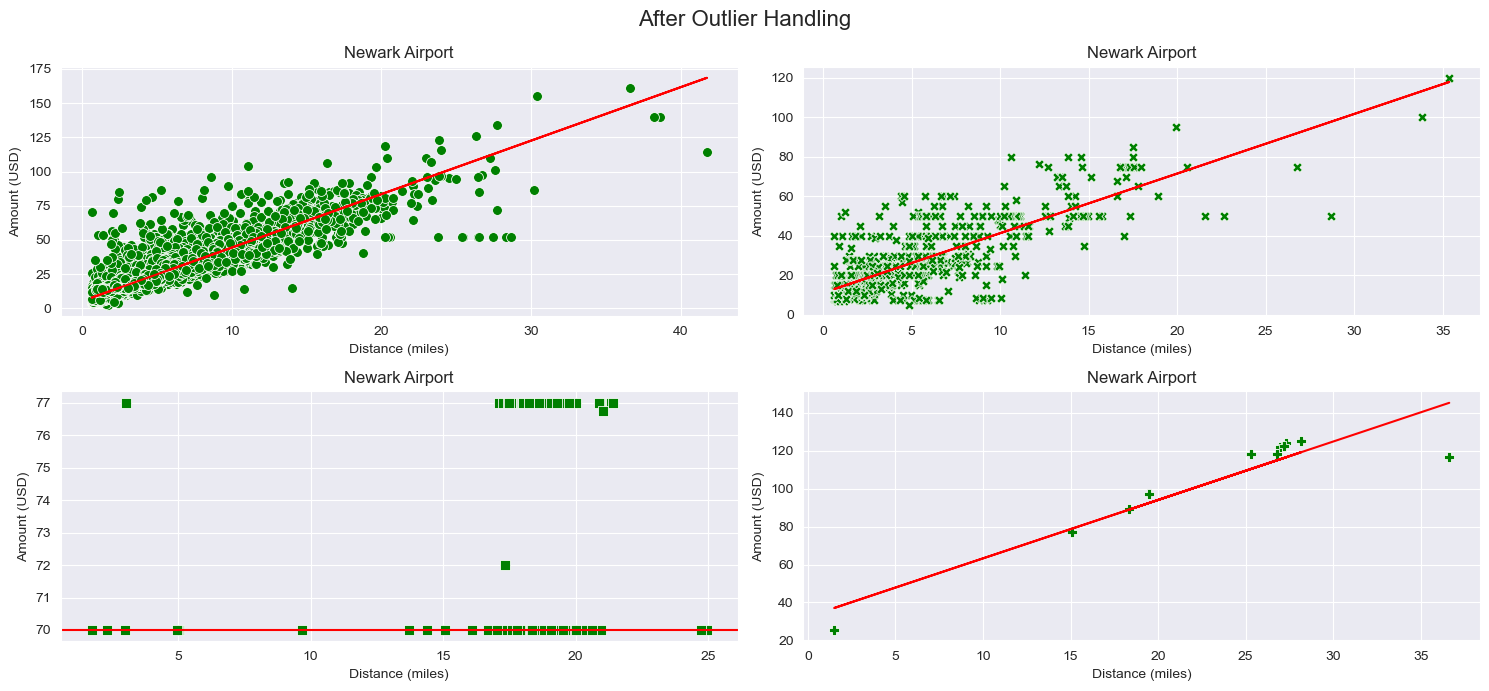

In [94]:
plt.figure(figsize=(15, 7))
plt.suptitle('After Outlier Handling', fontsize=16)

markers=['o','X','s','P']
for i, value in enumerate(data_frame['RatecodeID'].unique()):
    subset = data_frame[data_frame['RatecodeID'] == value]
    x = subset['trip_distance']
    y = subset['fare_amount']

    plt.subplot(2,2,i+1)
    sns.scatterplot(x=x, y=y,  color='green', marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')
    if value == 'JFK Airport':
        plt.axhline(y=70, color='red') 
        continue
    else:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='red')
    
plt.tight_layout()
plt.show()

In [95]:
bins_fare = [0,20,40,60,np.inf]
labels_fare = ['<20$','21-40$','41-60$','>60$']
data_frame['fare_amount_bins'] = pd.cut(data_frame['fare_amount'],bins=bins_fare,labels=labels_fare)

In [96]:
data_frame['fare_amount_bins'].value_counts()

fare_amount_bins
<20$      45978
21-40$    12274
41-60$     1846
>60$        600
Name: count, dtype: int64

    Tip Amount

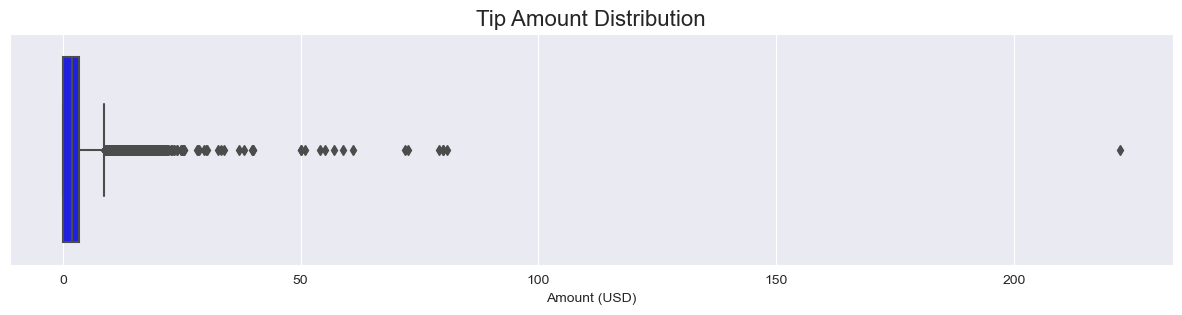

In [97]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=data_frame, x='tip_amount', color='blue')
plt.xlabel('Amount (USD)')
plt.title('Tip Amount Distribution', fontsize=16)

plt.show()

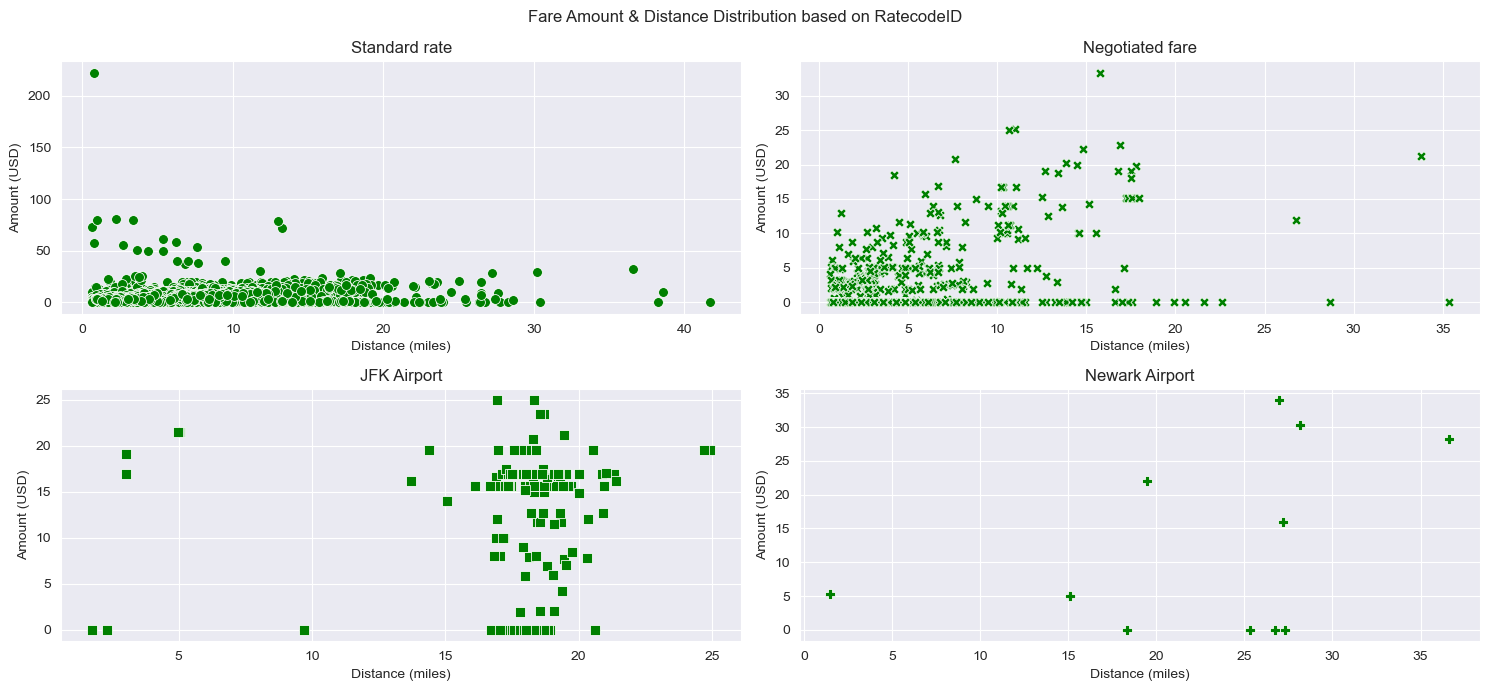

In [98]:
plt.figure(figsize=(15, 7))
plt.suptitle('Fare Amount & Distance Distribution based on RatecodeID')
markers=['o','X','s','P']
for i, value in enumerate(data_frame['RatecodeID'].unique()):
    plt.subplot(2,2,i+1)
    sns.scatterplot( data_frame[data_frame['RatecodeID'] == value], x='trip_distance', y='tip_amount',  color='green', marker=markers[i], s=50)
    plt.title(value)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

In [99]:
outliers = data_frame[data_frame['tip_amount']>50][['RatecodeID','distance_bins','fare_amount_bins','tip_amount']]
outliers

,RatecodeID,distance_bins,fare_amount_bins,tip_amount
297,Standard rate,7-10 miles,21-40$,54.00
16464,Standard rate,3-6 miles,21-40$,80.00
19464,Standard rate,>10 miles,41-60$,72.00
20685,Standard rate,<2 miles,<20$,72.55
24979,Standard rate,3-6 miles,21-40$,61.00
31679,Standard rate,>10 miles,41-60$,79.00
32984,Standard rate,3-6 miles,21-40$,51.00
38664,Standard rate,3-6 miles,<20$,80.88
40892,Standard rate,<2 miles,<20$,80.00
44718,Standard rate,3-6 miles,<20$,55.05


In [100]:
median_amount = data_frame[~data_frame.index.isin(outliers.index)].groupby(['RatecodeID','distance_bins','fare_amount_bins']).agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).reset_index()
median_amount.head()

,RatecodeID,distance_bins,fare_amount_bins,count,avg_tip,median_tip
0,JFK Airport,<2 miles,<20$,0,NaN,NaN
1,JFK Airport,<2 miles,21-40$,0,NaN,NaN
2,JFK Airport,<2 miles,41-60$,0,NaN,NaN
3,JFK Airport,<2 miles,>60$,1,0.0,0.0
4,JFK Airport,3-6 miles,<20$,0,NaN,NaN


In [101]:
new_tip = pd.merge(outliers, median_amount,on=['RatecodeID','distance_bins','fare_amount_bins'],how='left')
new_tip.drop(columns='count',inplace=True)
new_tip.index = outliers.index
display(new_tip.sample(5))

data_frame.loc[outliers.index,'tip_amount'] = new_tip['median_tip']
display(data_frame.loc[outliers.index][['RatecodeID','distance_bins','fare_amount','tip_amount']])

,RatecodeID,distance_bins,fare_amount_bins,tip_amount,avg_tip,median_tip
38664,Standard rate,3-6 miles,<20$,80.88,2.296573,2.56
50588,Standard rate,<2 miles,<20$,222.22,1.446475,1.50
16464,Standard rate,3-6 miles,21-40$,80.00,3.168055,3.00
44718,Standard rate,3-6 miles,<20$,55.05,2.296573,2.56
40892,Standard rate,<2 miles,<20$,80.00,1.446475,1.50


,RatecodeID,distance_bins,fare_amount,tip_amount
297,Standard rate,7-10 miles,33.8,5.00
16464,Standard rate,3-6 miles,26.1,3.00
19464,Standard rate,>10 miles,56.2,5.00
20685,Standard rate,<2 miles,8.6,1.50
24979,Standard rate,3-6 miles,26.8,3.00
31679,Standard rate,>10 miles,49.2,5.00
32984,Standard rate,3-6 miles,25.4,3.00
38664,Standard rate,3-6 miles,14.2,2.56
40892,Standard rate,<2 miles,7.2,1.50
44718,Standard rate,3-6 miles,17.7,2.56


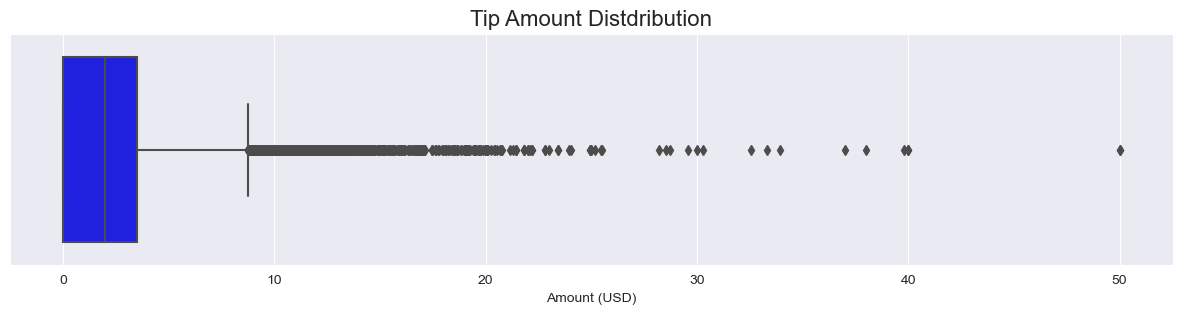

In [102]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=data_frame, x='tip_amount', color='blue')
plt.xlabel('Amount (USD)')
plt.title('Tip Amount Distdribution', fontsize=16)

plt.show()

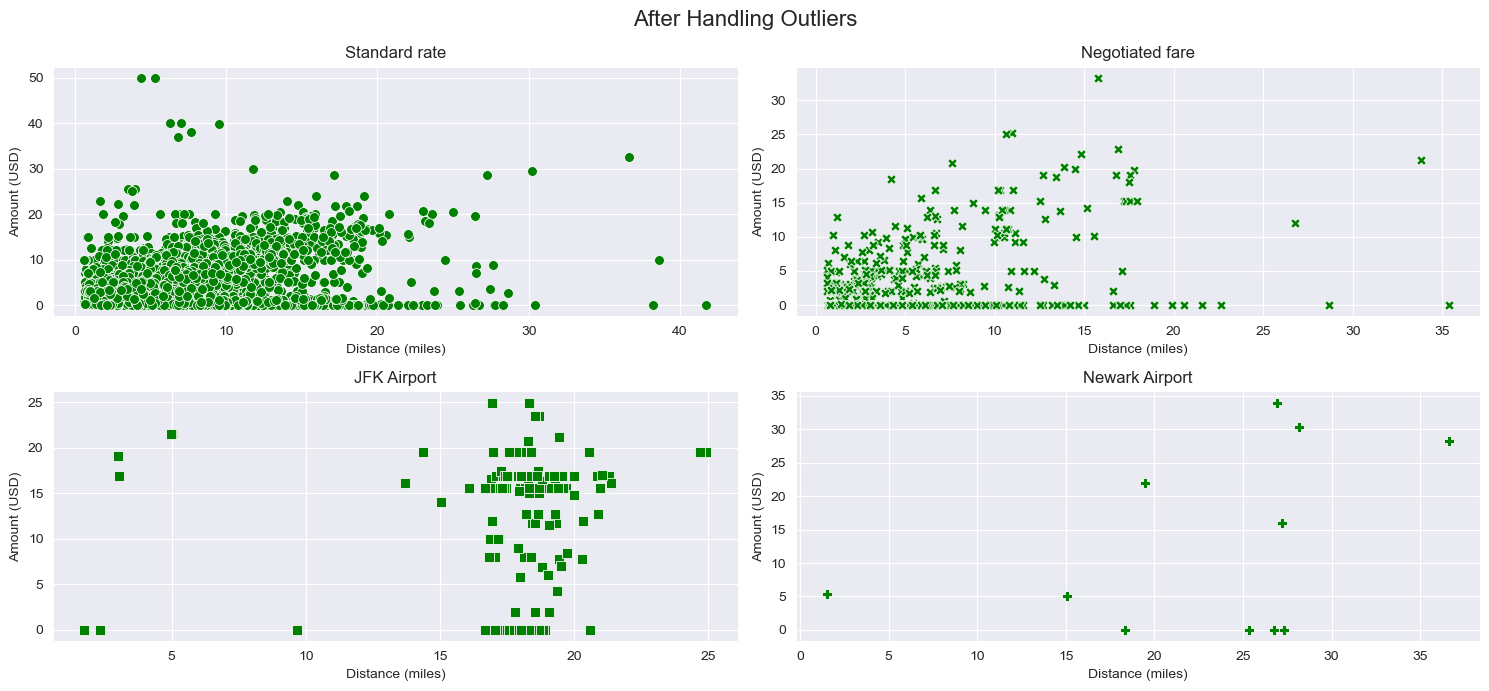

In [103]:
plt.figure(figsize=(15, 7))
plt.suptitle('After Handling Outliers', fontsize=16)

markers=['o','X','s','P']

for i, value in enumerate(data_frame['RatecodeID'].unique()):
    plt.subplot(2,2,i+1)
    sns.scatterplot( data_frame[data_frame['RatecodeID'] == value], x='trip_distance', y='tip_amount',  color='green', marker=markers[i], s=50)
    plt.title(value)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

In [104]:
bins_tip = [-np.inf,0,5,10,15,np.inf]
labels_tip = ['0$','1-5$','6-10$','11-15$','>15$']
data_frame['tip_amount_bins'] = pd.cut(data_frame['tip_amount'],bins=bins_tip,labels=labels_tip)

In [105]:
data_frame['tip_amount_bins'].value_counts()

tip_amount_bins
1-5$      29821
0$        23683
6-10$      6191
11-15$      744
>15$        259
Name: count, dtype: int64

    Payment Types

In [106]:
data_frame['payment_type']=data_frame['payment_type'].replace({1:'Credit card',2:'Cash',3:'No charge',4:'Dispute',5:'Unknown',6:'Voided trip'})
data_frame['payment_type'].value_counts()

payment_type
Credit card    40260
Cash           19886
Unknown          435
No charge         98
Dispute           19
Name: count, dtype: int64

    Trip Type

In [107]:
data_frame['trip_type']=data_frame['trip_type'].replace({1:'Street-hail',2:'Dispatch'})
data_frame['trip_type'].value_counts()

trip_type
Street-hail    60150
Dispatch         548
Name: count, dtype: int64

Setting Column & Index

In [108]:
data_frame.head(2)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,...,DOZone,pickup_time,day_category,distance_bins,trip_duration,duration_bins,speed,speed_bins,fare_amount_bins,tip_amount_bins
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,166,143,1.0,2.58,14.9,4.03,Credit card,...,Lincoln Square West,Midnight,Weekend,3-6 miles,11.02,11-20 minutes,14.05,11-20 mph,<20$,1-5$
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,24,43,1.0,1.81,10.7,2.64,Credit card,...,Central Park,Midnight,Weekend,<2 miles,6.77,<10 minutes,16.04,11-20 mph,<20$,1-5$


In [109]:
data_frame.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'tip_amount', 'payment_type', 'trip_type', 'PUBorough',
       'PUZone', 'DOBorough', 'DOZone', 'pickup_time', 'day_category',
       'distance_bins', 'trip_duration', 'duration_bins', 'speed',
       'speed_bins', 'fare_amount_bins', 'tip_amount_bins'],
      dtype='object')

In [110]:
data_frame = data_frame[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'day_category', 'pickup_time', 'RatecodeID', 'PULocationID','PUBorough', 'PUZone', 'DOLocationID', 'DOBorough', 'DOZone', 'passenger_count', 'trip_distance', 'distance_bins', 'fare_amount', 'fare_amount_bins', 'tip_amount', 'tip_amount_bins', 'payment_type', 'trip_type', 'trip_duration', 'duration_bins', 'speed', 'speed_bins']]
data_frame

,lpep_pickup_datetime,lpep_dropoff_datetime,day_category,pickup_time,RatecodeID,PULocationID,PUBorough,PUZone,DOLocationID,DOBorough,...,fare_amount,fare_amount_bins,tip_amount,tip_amount_bins,payment_type,trip_type,trip_duration,duration_bins,speed,speed_bins
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Weekend,Midnight,Standard rate,166,Manhattan,Morningside Heights,143,Manhattan,...,14.90,<20$,4.03,1-5$,Credit card,Street-hail,11.02,11-20 minutes,14.05,11-20 mph
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Weekend,Midnight,Standard rate,24,Manhattan,Bloomingdale,43,Manhattan,...,10.70,<20$,2.64,1-5$,Credit card,Street-hail,6.77,<10 minutes,16.04,11-20 mph
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,238,Manhattan,...,6.50,<20$,1.70,1-5$,Credit card,Street-hail,5.82,<10 minutes,13.40,11-20 mph
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,74,Manhattan,...,6.00,<20$,0.00,0$,Credit card,Street-hail,5.97,<10 minutes,11.06,11-20 mph
5,2023-01-01 00:53:31,2023-01-01 01:11:04,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,262,Manhattan,...,17.70,<20$,0.00,0$,Cash,Street-hail,17.55,11-20 minutes,9.50,<10 mph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,Weekdays,Night,Standard rate,49,Brooklyn,Clinton Hill,62,Brooklyn,...,15.70,<20$,0.00,0$,Unknown,Street-hail,13.00,11-20 minutes,10.66,11-20 mph
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,Weekdays,Night,Standard rate,10,Queens,Baisley Park,205,Queens,...,4.41,<20$,0.00,0$,Unknown,Street-hail,8.00,<10 minutes,16.05,11-20 mph
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,Weekdays,Night,Standard rate,66,Brooklyn,DUMBO/Vinegar Hill,37,Brooklyn,...,16.53,<20$,3.51,1-5$,Credit card,Street-hail,16.00,11-20 minutes,12.90,11-20 mph
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,Weekdays,Night,Standard rate,225,Brooklyn,Stuyvesant Heights,189,Brooklyn,...,14.98,<20$,3.20,1-5$,Credit card,Street-hail,18.00,11-20 minutes,10.10,11-20 mph


<Axes: >

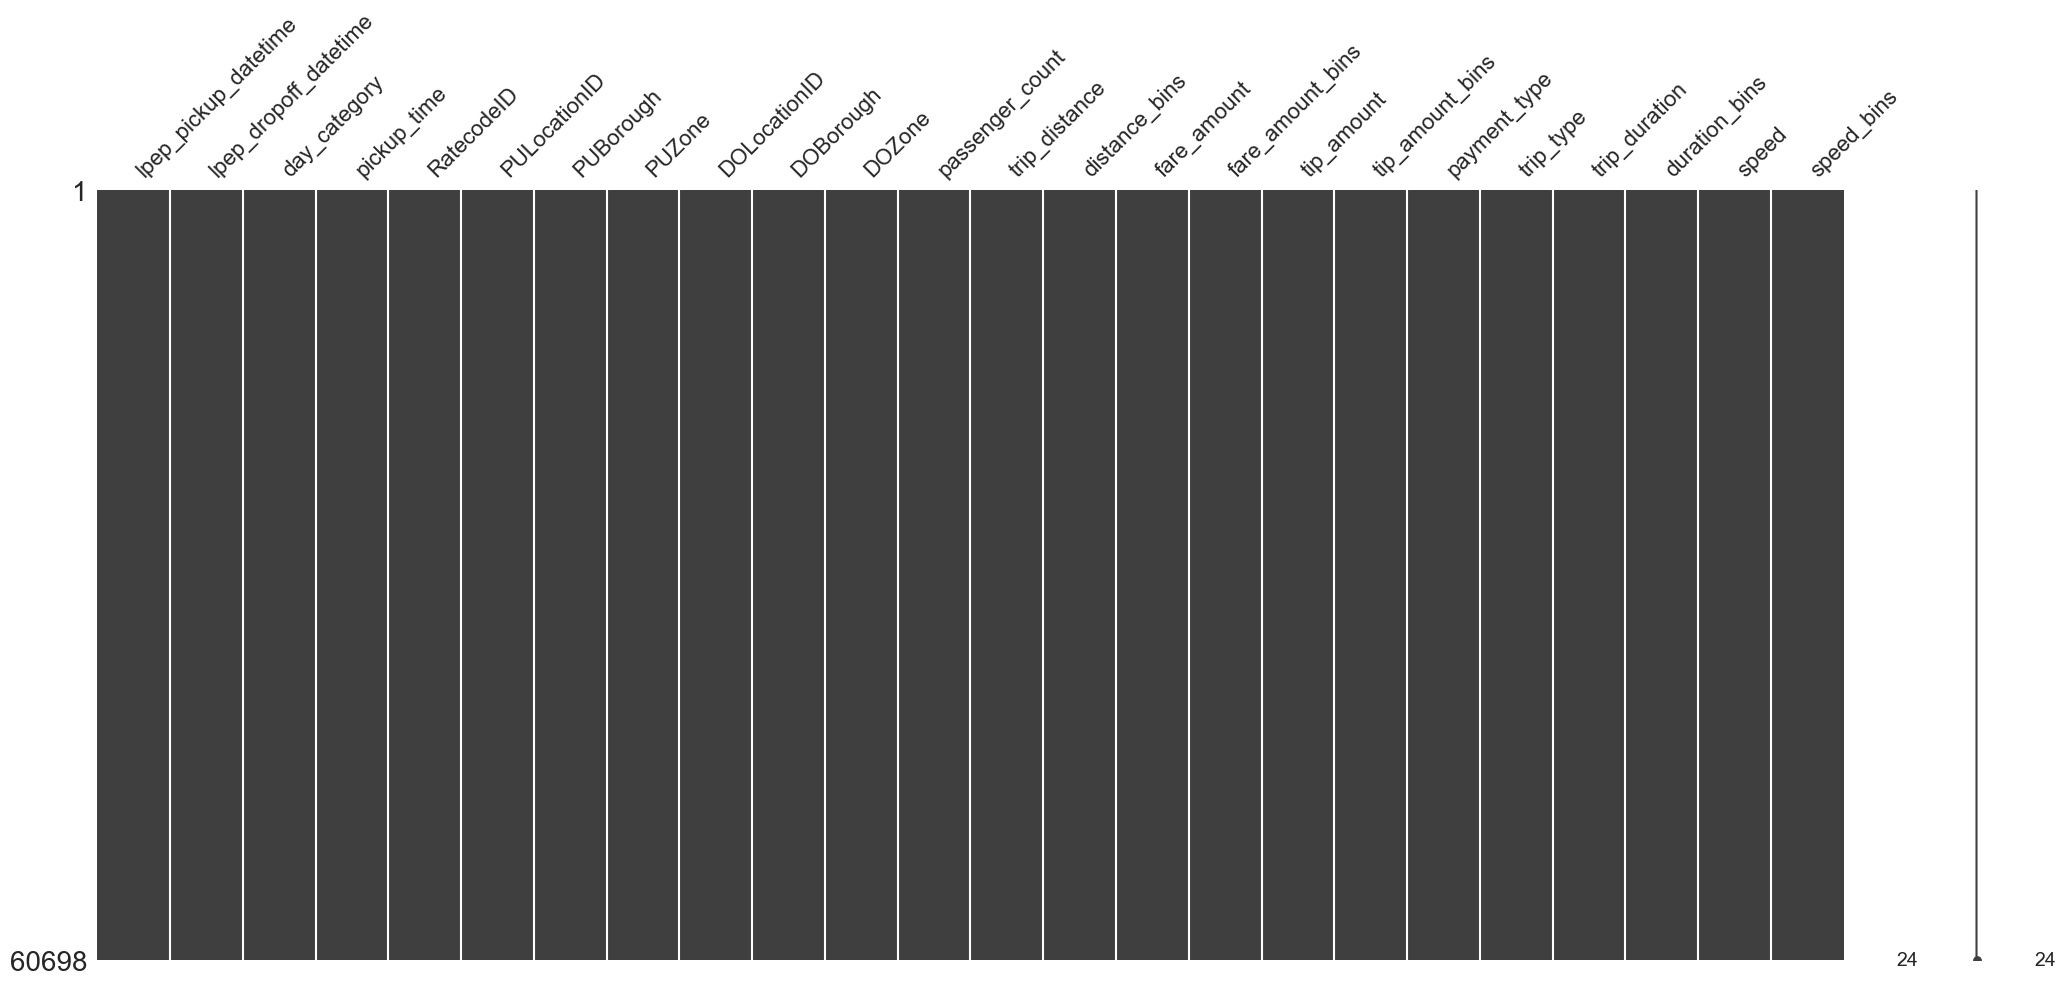

In [111]:
msno.matrix(data_frame)

In [113]:
data_frame.to_csv(r'D:/Bootcamp/Tugas/Capstone_Project_2/Data/Cleaned_Data/NYC_TLC_Trip_Record_Clean.csv', index= False)